In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ A/D conversion: Audio loaded


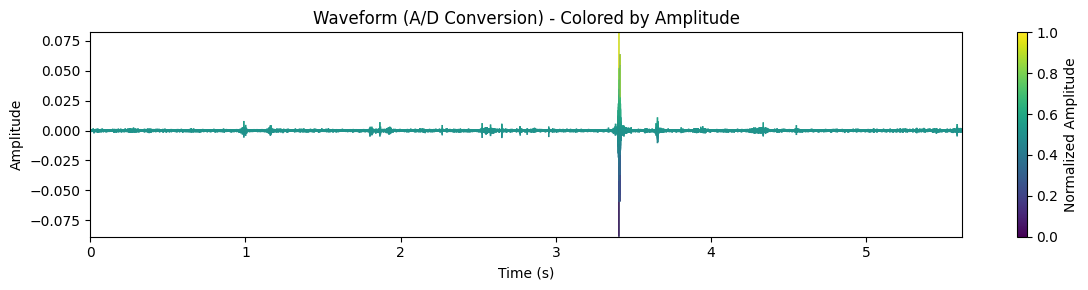

✅ Pre-emphasis applied


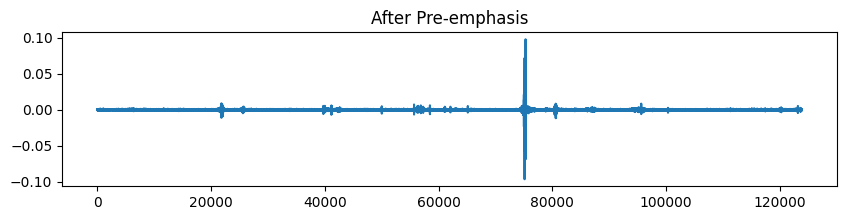

✅ Framing and Windowing done


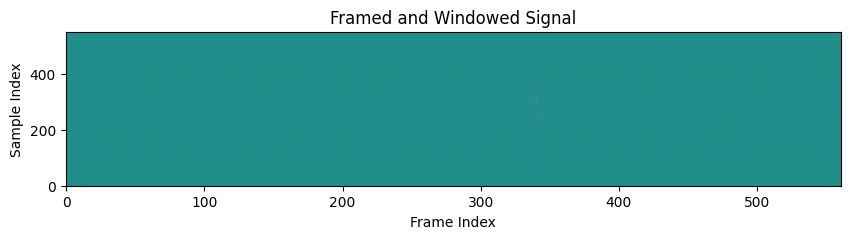

✅ DFT and Power Spectrum calculated
✅ Mel filterbank applied


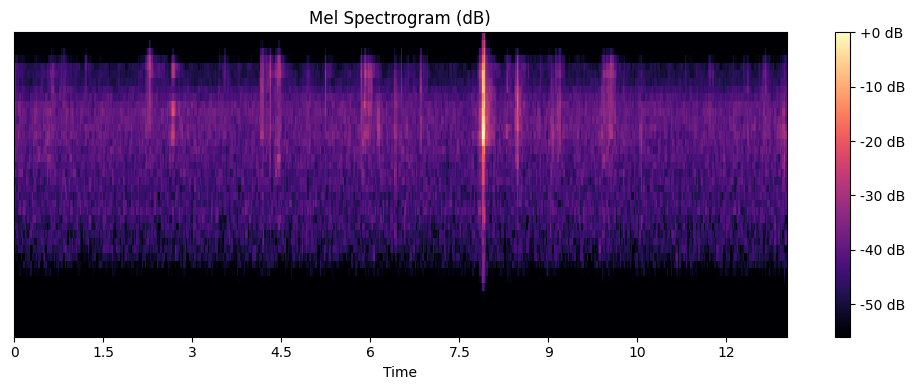

✅ log(Mel energies) calculated
✅ IDFT (DCT) to get MFCCs


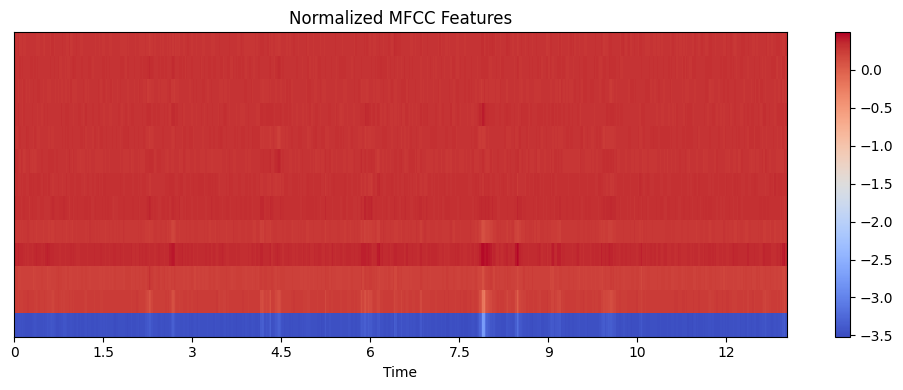

✅ Dynamic features (Δ and ΔΔ) extracted


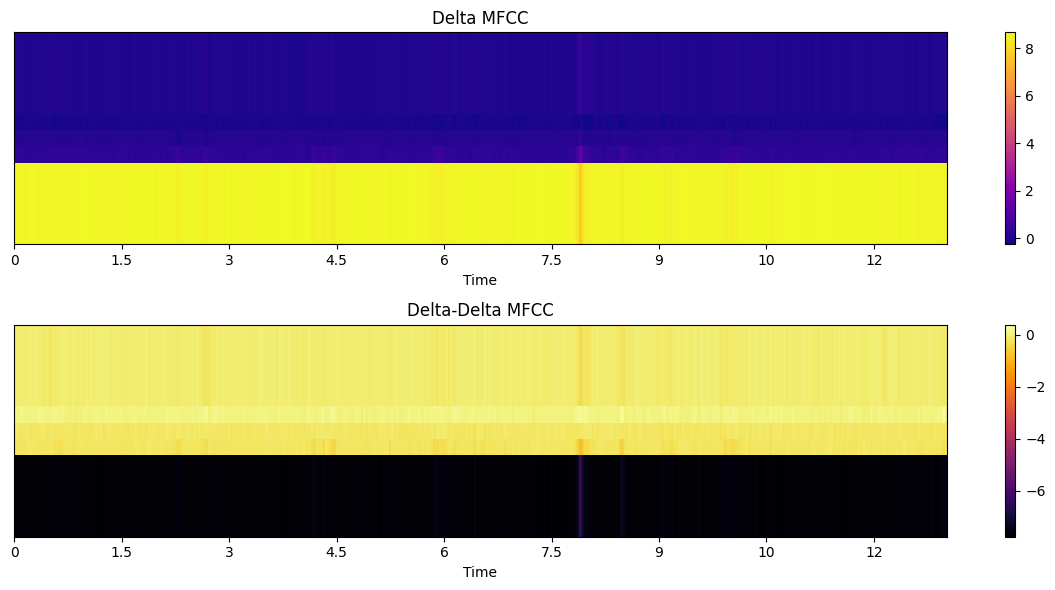

✅ Final Feature Transform complete
Final feature shape: (561, 39)


In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.fftpack
from matplotlib.collections import LineCollection

# Load audio
file_path = "/content/drive/MyDrive/rpw_dataset/sound python/train/rpw/20230815_004546-0convert (1)_filtered - Copy - Copy.wav"
signal, sr = librosa.load(file_path, sr=22050)
print("✅ A/D conversion: Audio loaded")

# Colored waveform
times = np.linspace(0, len(signal) / sr, num=len(signal))
amplitude = signal
norm_amp = (amplitude - np.min(amplitude)) / (np.max(amplitude) - np.min(amplitude))
points = np.array([times, amplitude]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap='viridis', norm=plt.Normalize(0, 1))
lc.set_array(norm_amp[:-1])
lc.set_linewidth(1)

plt.figure(figsize=(12, 3))
plt.gca().add_collection(lc)
plt.xlim(times[0], times[-1])
plt.ylim(np.min(amplitude), np.max(amplitude))
plt.title("Waveform (A/D Conversion) - Colored by Amplitude")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.colorbar(lc, label="Normalized Amplitude")
plt.tight_layout()
plt.show()

# Pre-emphasis
pre_emphasis = 0.97
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
print("✅ Pre-emphasis applied")
plt.figure(figsize=(10, 2))
plt.plot(emphasized_signal)
plt.title("After Pre-emphasis")
plt.show()

# Framing and Windowing
frame_size = 0.025
frame_stride = 0.01
frame_length = int(round(frame_size * sr))
frame_step = int(round(frame_stride * sr))
signal_length = len(emphasized_signal)
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))
pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(emphasized_signal, z)

indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + \
          np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]
frames *= np.hamming(frame_length)
print("✅ Framing and Windowing done")
plt.figure(figsize=(10, 2))
plt.imshow(frames.T, aspect='auto', origin='lower')
plt.title("Framed and Windowed Signal")
plt.xlabel("Frame Index")
plt.ylabel("Sample Index")
plt.show()

# FFT and Power Spectrum
NFFT = 512
mag_frames = np.absolute(np.fft.rfft(frames, NFFT))
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))
print("✅ DFT and Power Spectrum calculated")

# Mel Filterbank
nfilt = 40
mel_filters = librosa.filters.mel(sr=sr, n_fft=NFFT, n_mels=nfilt)
mel_energy = np.dot(pow_frames, mel_filters.T)
print("✅ Mel filterbank applied")

# Convert to dB scale for better visualization
mel_db = librosa.power_to_db(mel_energy.T, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', cmap='magma')  # Better contrast
plt.title("Mel Spectrogram (dB)")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()

# Logarithm of Mel Energies
log_mel_energy = np.log(mel_energy + 1e-9)
print("✅ log(Mel energies) calculated")

# Discrete Cosine Transform (MFCCs)
mfcc = scipy.fftpack.dct(log_mel_energy, type=2, axis=1, norm='ortho')[:, :13]
print("✅ IDFT (DCT) to get MFCCs")

# Normalize MFCC for better visualization
mfcc_norm = (mfcc - np.mean(mfcc)) / np.std(mfcc)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_norm.T, x_axis='time', cmap='coolwarm')
plt.title("Normalized MFCC Features")
plt.colorbar()
plt.tight_layout()
plt.show()

# Delta and Delta-Delta
delta_mfcc = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
print("✅ Dynamic features (Δ and ΔΔ) extracted")

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(delta_mfcc.T, x_axis='time', cmap='plasma')
plt.title("Delta MFCC")
plt.colorbar()
plt.subplot(2, 1, 2)
librosa.display.specshow(delta2_mfcc.T, x_axis='time', cmap='inferno')
plt.title("Delta-Delta MFCC")
plt.colorbar()
plt.tight_layout()
plt.show()

# Final stacking of features
final_features = np.hstack((mfcc, delta_mfcc, delta2_mfcc))
print("✅ Final Feature Transform complete")
print("Final feature shape:", final_features.shape)

# Optional: Save features
# np.save("final_mfcc_features.npy", final_features)


✅ A/D conversion: Audio loaded


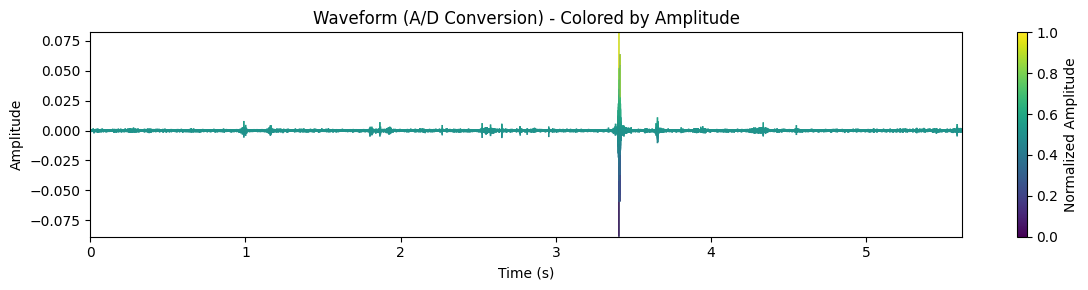

✅ Pre-emphasis applied


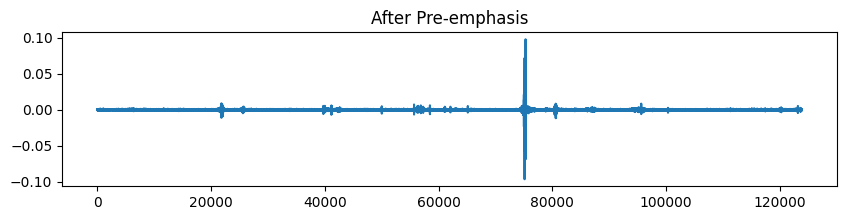

✅ Framing and Windowing done


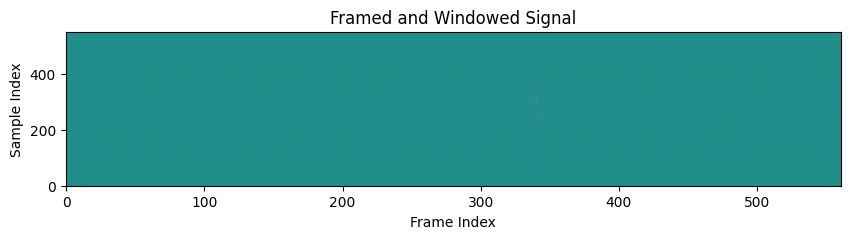

✅ DFT and Power Spectrum calculated
✅ Mel filterbank applied


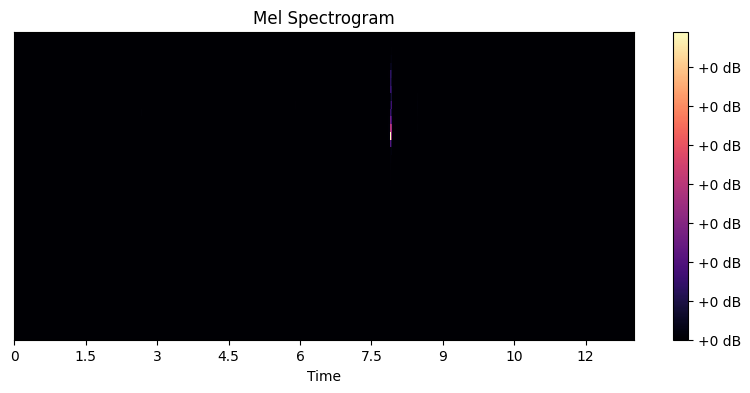

✅ log(Mel energies) calculated
✅ IDFT (DCT) to get MFCCs


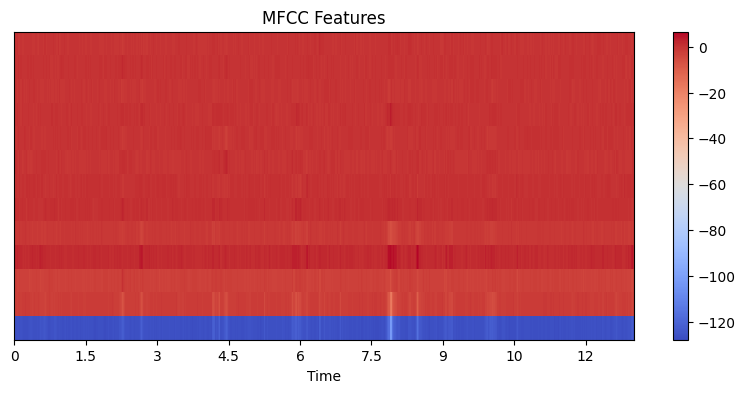

✅ Dynamic features (Δ and ΔΔ) extracted


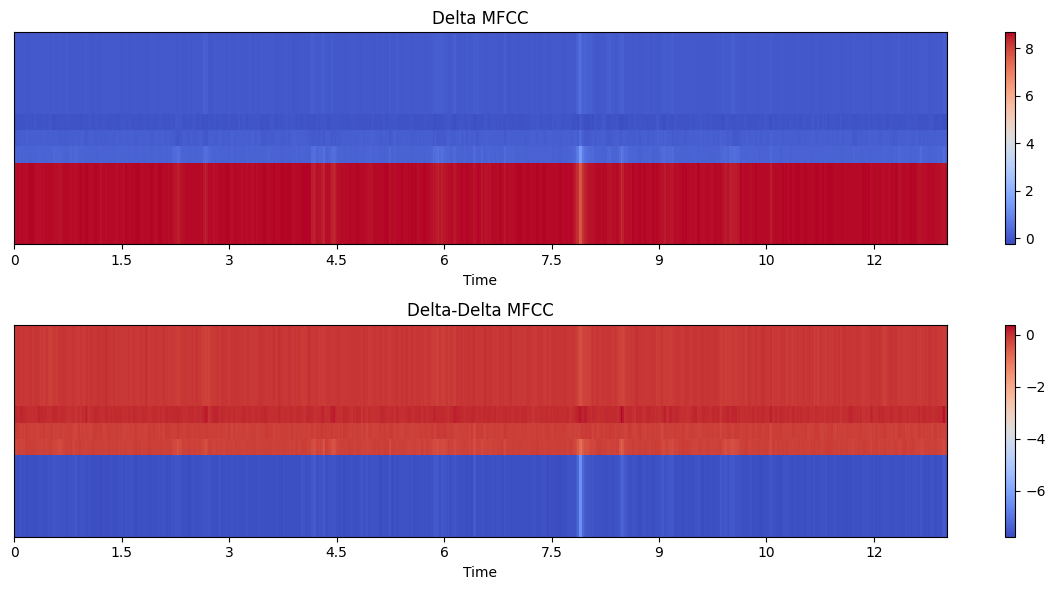

✅ Final Feature Transform complete
Final feature shape: (561, 39)


In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.fftpack
from matplotlib.collections import LineCollection

# Load audio (A/D conversion step simulated here)
file_path = "/content/drive/MyDrive/rpw_dataset/sound python/train/rpw/20230815_004546-0convert (1)_filtered - Copy - Copy.wav"
signal, sr = librosa.load(file_path, sr=22050)
print("✅ A/D conversion: Audio loaded")

# Colored waveform: amplitude-based color map using line segments
# Prepare time and amplitude data
times = np.linspace(0, len(signal) / sr, num=len(signal))
amplitude = signal

# Normalize amplitude to [0,1] for colormap mapping
norm_amp = (amplitude - np.min(amplitude)) / (np.max(amplitude) - np.min(amplitude))

# Create line segments with color
points = np.array([times, amplitude]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap='viridis', norm=plt.Normalize(0, 1))
lc.set_array(norm_amp[:-1])
lc.set_linewidth(1)

# Plot the waveform with color differentiation based on amplitude
plt.figure(figsize=(12, 3))
plt.gca().add_collection(lc)
plt.xlim(times[0], times[-1])
plt.ylim(np.min(amplitude), np.max(amplitude))
plt.title("Waveform (A/D Conversion) - Colored by Amplitude")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.colorbar(lc, label="Normalized Amplitude")
plt.tight_layout()
plt.show()

# Pre-emphasis
pre_emphasis = 0.97
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
print("✅ Pre-emphasis applied")
plt.figure(figsize=(10, 2))
plt.plot(emphasized_signal)
plt.title("After Pre-emphasis")
plt.show()

# Framing and Windowing
frame_size = 0.025
frame_stride = 0.01
frame_length = int(round(frame_size * sr))
frame_step = int(round(frame_stride * sr))
signal_length = len(emphasized_signal)
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))

pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(emphasized_signal, z)

indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + \
          np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]

# Apply Hamming window
frames *= np.hamming(frame_length)
print("✅ Framing and Windowing done")
plt.figure(figsize=(10, 2))
plt.imshow(frames.T, aspect='auto', origin='lower')
plt.title("Framed and Windowed Signal")
plt.xlabel("Frame Index")
plt.ylabel("Sample Index")
plt.show()

# FFT and Power Spectrum
NFFT = 512
mag_frames = np.absolute(np.fft.rfft(frames, NFFT))
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))
print("✅ DFT and Power Spectrum calculated")

# Mel Filterbank
nfilt = 40
mel_filters = librosa.filters.mel(sr=sr, n_fft=NFFT, n_mels=nfilt)
mel_energy = np.dot(pow_frames, mel_filters.T)
print("✅ Mel filterbank applied")

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_energy.T, sr=sr, x_axis='time')
plt.title("Mel Spectrogram")
plt.colorbar(format="%+2.0f dB")
plt.show()

# Logarithm of Mel Energies
log_mel_energy = np.log(mel_energy + 1e-9)  # add epsilon to avoid log(0)
print("✅ log(Mel energies) calculated")

# Discrete Cosine Transform (DCT - similar to IDFT in concept)
mfcc = scipy.fftpack.dct(log_mel_energy, type=2, axis=1, norm='ortho')[:, :13]
print("✅ IDFT (DCT) to get MFCCs")

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc.T, x_axis='time')
plt.title("MFCC Features")
plt.colorbar()
plt.show()

# Dynamic features
delta_mfcc = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
print("✅ Dynamic features (Δ and ΔΔ) extracted")

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(delta_mfcc.T, x_axis='time')
plt.title("Delta MFCC")
plt.colorbar()
plt.subplot(2, 1, 2)
librosa.display.specshow(delta2_mfcc.T, x_axis='time')0
plt.title("Delta-Delta MFCC")
plt.colorbar()
plt.tight_layout()
plt.show()

# Final feature stacking
final_features = np.hstack((mfcc, delta_mfcc, delta2_mfcc))
print("✅ Final Feature Transform complete")
print("Final feature shape:", final_features.shape)


<ipython-input-4-d1944cd43766>:60: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  audio_base = MobileNetV2(include_top=False, input_tensor=audio_input, weights="imagenet")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/2
81/81 ━━━━━━━━━━━━━━━━━━━━ 76s 343ms/step - accuracy: 0.8287 - loss: 0.3346 - val_accuracy: 0.7484 - val_loss: 1.7313
Epoch 2/2
81/81 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.9853 - loss: 0.0447 - val_accuracy: 0.7516 - val_loss: 2.8684


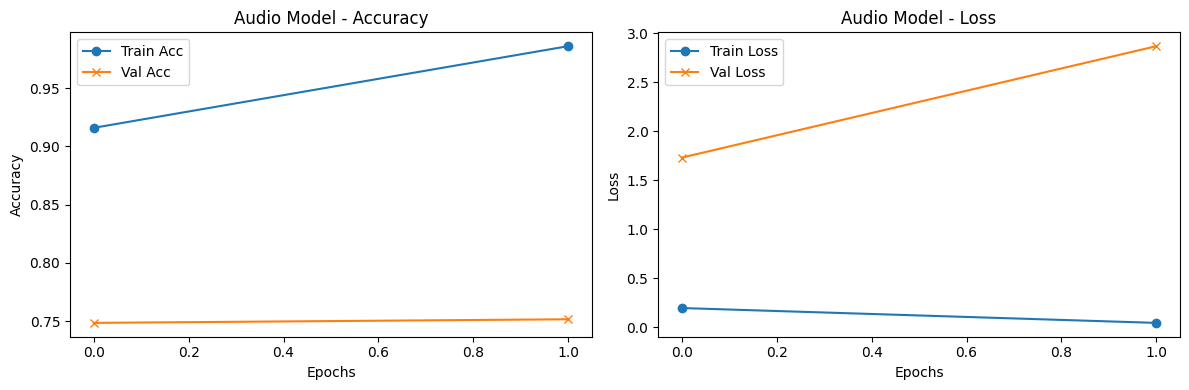

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 311ms/step

Audio Evaluation:
              precision    recall  f1-score   support

        nrpw       0.33      0.01      0.02        80
         rpw       0.75      0.99      0.86       242

    accuracy                           0.75       322
   macro avg       0.54      0.50      0.44       322
weighted avg       0.65      0.75      0.65       322



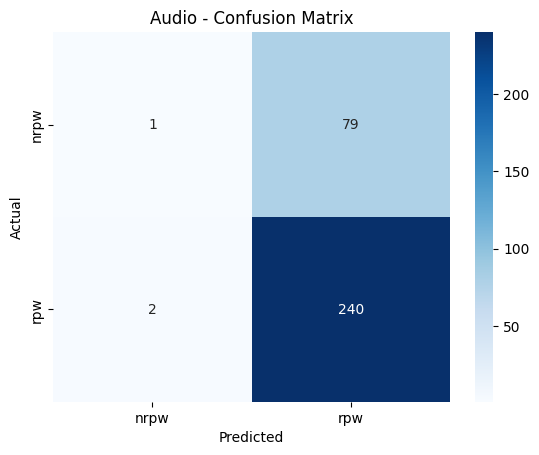

✅ Audio model saved to: /content/drive/MyDrive/yolov9c/audio_model.keras


In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

# ---------------------- Paths ----------------------
TRAIN_AUDIO_DIR = "/content/drive/MyDrive/rpw_dataset/sound python/train"
TEST_AUDIO_DIR = "/content/drive/MyDrive/rpw_dataset/sound python/test"

# ---------------- Audio Processing ----------------
VALID_AUDIO_EXTENSIONS = (".wav", ".mp3", ".flac", ".ogg", ".m4a")

def extract_audio_features(file_path, max_pad_len=128):
    try:
        audio, sr = librosa.load(file_path, sr=22050)
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, max_pad_len - mel_spec_db.shape[1])), mode="constant") \
                     if mel_spec_db.shape[1] < max_pad_len else mel_spec_db[:, :max_pad_len]
        return mel_spec_db
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

def load_audio_data(directory):
    X_mel, y = [], []
    for label in ["rpw", "nrpw"]:
        class_dir = os.path.join(directory, label)
        for file in os.listdir(class_dir):
            if file.lower().endswith(VALID_AUDIO_EXTENSIONS):
                path = os.path.join(class_dir, file)
                mel = extract_audio_features(path)
                if mel is not None:
                    mel = np.repeat(mel[..., np.newaxis], 3, axis=-1) / 255.0
                    X_mel.append(mel)
                    y.append(label)
    return np.array(X_mel), np.array(y)

# ---------------- Load Data ----------------
X_audio_train, y_audio_train = load_audio_data(TRAIN_AUDIO_DIR)
X_audio_test, y_audio_test = load_audio_data(TEST_AUDIO_DIR)

# ---------------- Label Encoding ----------------
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_audio_train)
y_test = label_encoder.transform(y_audio_test)

# ---------------- Model ----------------
audio_input = Input(shape=(128, 128, 3))
audio_base = MobileNetV2(include_top=False, input_tensor=audio_input, weights="imagenet")
x_audio = GlobalAveragePooling2D()(audio_base.output)
x_audio = Dense(64, activation='relu')(x_audio)
x_audio = Dropout(0.3)(x_audio)
audio_output = Dense(1, activation="sigmoid")(x_audio)
audio_model = Model(audio_input, audio_output)
audio_model.compile(optimizer=Adam(1e-4), loss="binary_crossentropy", metrics=["accuracy"])

# ---------------- Class Weights ----------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# ---------------- Callback ----------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ---------------- Train ----------------
history_audio = audio_model.fit(
    X_audio_train, y_train,
    epochs=5,
    batch_size=16,
    validation_data=(X_audio_test, y_test),
    callbacks=[early_stop],
    class_weight=class_weights_dict
)

# ---------------- Plot ----------------
def plot_training_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc', marker='o')
    plt.plot(history.history['val_accuracy'], label='Val Acc', marker='x')
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
    plt.title(f"{title} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_training_history(history_audio, "Audio Model")

# ---------------- Evaluation ----------------
def evaluate_model(model, X, y_true, name=""):
    y_prob = model.predict(X)
    y_pred = (y_prob > 0.5).astype(int)
    print(f"\n{name} Evaluation:")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model(audio_model, X_audio_test, y_test, name="Audio")

# ---------------- Save ----------------
AUDIO_MODEL_PATH = "/content/drive/MyDrive/yolov9c/audio_model.keras"
audio_model.save(AUDIO_MODEL_PATH)
print(f"✅ Audio model saved to: {AUDIO_MODEL_PATH}")

✅ A/D conversion: Audio loaded


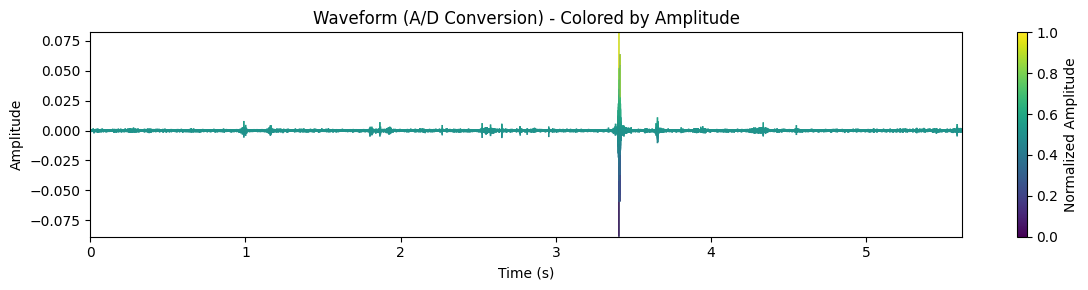

✅ Pre-emphasis applied


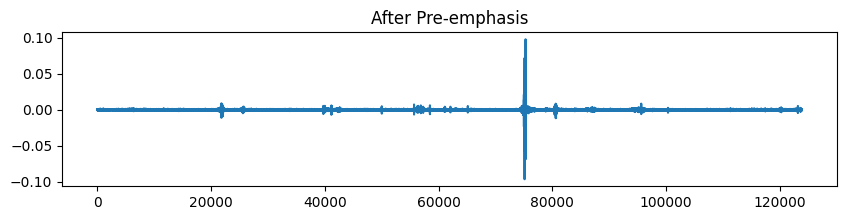

✅ Framing and Windowing done


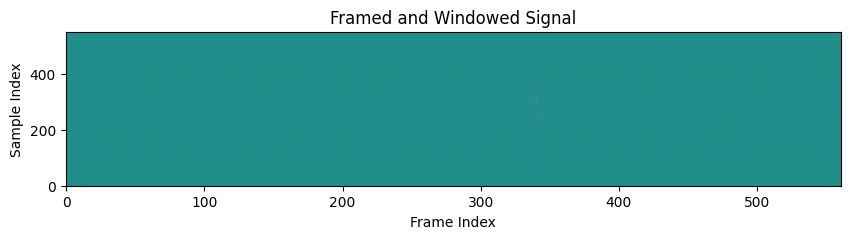

✅ DFT and Power Spectrum calculated
✅ Mel filterbank applied


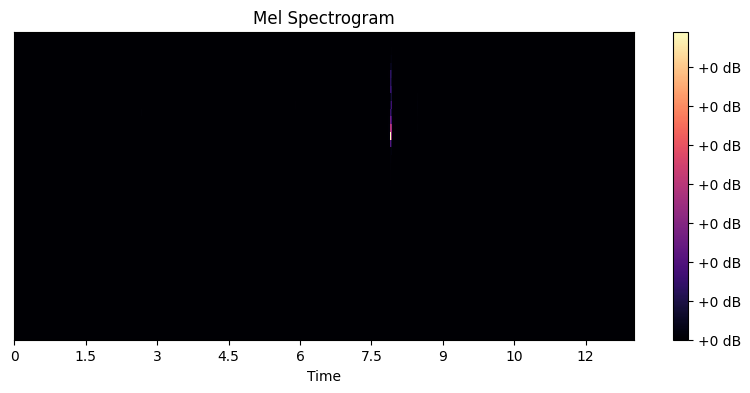

✅ log(Mel energies) calculated
✅ IDFT (DCT) to get MFCCs


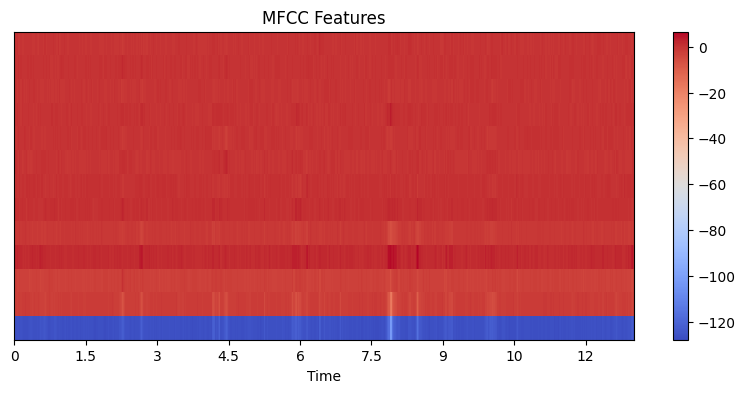

✅ Dynamic features (Δ and ΔΔ) extracted


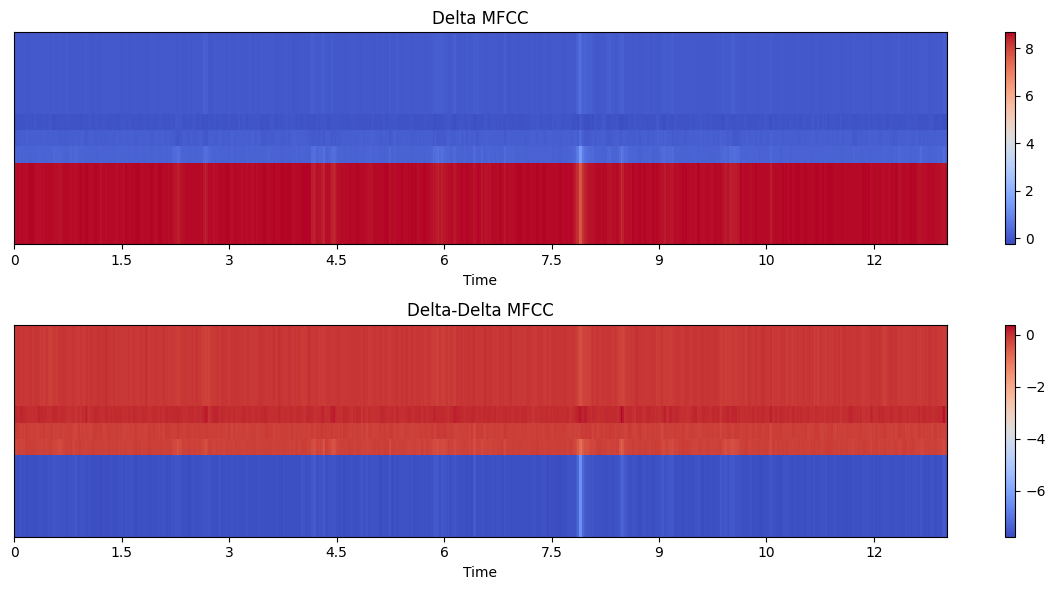

✅ Final Feature Transform complete
Final feature shape: (561, 39)


In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.fftpack
from matplotlib.collections import LineCollection

# Load audio (A/D conversion step simulated here)
file_path = "/content/drive/MyDrive/rpw_dataset/sound python/train/rpw/20230815_004546-0convert (1)_filtered - Copy - Copy.wav"
signal, sr = librosa.load(file_path, sr=22050)
print("✅ A/D conversion: Audio loaded")

# Colored waveform: amplitude-based color map using line segments
# Prepare time and amplitude data
times = np.linspace(0, len(signal) / sr, num=len(signal))
amplitude = signal

# Normalize amplitude to [0,1] for colormap mapping
norm_amp = (amplitude - np.min(amplitude)) / (np.max(amplitude) - np.min(amplitude))

# Create line segments with color
points = np.array([times, amplitude]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap='viridis', norm=plt.Normalize(0, 1))
lc.set_array(norm_amp[:-1])
lc.set_linewidth(1)

# Plot the waveform with color differentiation based on amplitude
plt.figure(figsize=(12, 3))
plt.gca().add_collection(lc)
plt.xlim(times[0], times[-1])
plt.ylim(np.min(amplitude), np.max(amplitude))
plt.title("Waveform (A/D Conversion) - Colored by Amplitude")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.colorbar(lc, label="Normalized Amplitude")
plt.tight_layout()
plt.show()

# Pre-emphasis
pre_emphasis = 0.97
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
print("✅ Pre-emphasis applied")
plt.figure(figsize=(10, 2))
plt.plot(emphasized_signal)
plt.title("After Pre-emphasis")
plt.show()

# Framing and Windowing
frame_size = 0.025
frame_stride = 0.01
frame_length = int(round(frame_size * sr))
frame_step = int(round(frame_stride * sr))
signal_length = len(emphasized_signal)
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))

pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(emphasized_signal, z)

indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + \
          np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]

# Apply Hamming window
frames *= np.hamming(frame_length)
print("✅ Framing and Windowing done")
plt.figure(figsize=(10, 2))
plt.imshow(frames.T, aspect='auto', origin='lower')
plt.title("Framed and Windowed Signal")
plt.xlabel("Frame Index")
plt.ylabel("Sample Index")
plt.show()

# FFT and Power Spectrum
NFFT = 512
mag_frames = np.absolute(np.fft.rfft(frames, NFFT))
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))
print("✅ DFT and Power Spectrum calculated")

# Mel Filterbank
nfilt = 40
mel_filters = librosa.filters.mel(sr=sr, n_fft=NFFT, n_mels=nfilt)
mel_energy = np.dot(pow_frames, mel_filters.T)
print("✅ Mel filterbank applied")

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_energy.T, sr=sr, x_axis='time')
plt.title("Mel Spectrogram")
plt.colorbar(format="%+2.0f dB")
plt.show()

# Logarithm of Mel Energies
log_mel_energy = np.log(mel_energy + 1e-9)  # add epsilon to avoid log(0)
print("✅ log(Mel energies) calculated")

# Discrete Cosine Transform (DCT - similar to IDFT in concept)
mfcc = scipy.fftpack.dct(log_mel_energy, type=2, axis=1, norm='ortho')[:, :13]
print("✅ IDFT (DCT) to get MFCCs")

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc.T, x_axis='time')
plt.title("MFCC Features")
plt.colorbar()
plt.show()

# Dynamic features
delta_mfcc = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
print("✅ Dynamic features (Δ and ΔΔ) extracted")

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(delta_mfcc.T, x_axis='time')
plt.title("Delta MFCC")
plt.colorbar()
plt.subplot(2, 1, 2)
librosa.display.specshow(delta2_mfcc.T, x_axis='time')
plt.title("Delta-Delta MFCC")
plt.colorbar()
plt.tight_layout()
plt.show()

# Final feature stacking
final_features = np.hstack((mfcc, delta_mfcc, delta2_mfcc))
print("✅ Final Feature Transform complete")
print("Final feature shape:", final_features.shape)


🔍 Showing MFCC waveform for: /content/drive/MyDrive/rpw_dataset/sound python/train/rpw/20230815_004546-0convert (1)_filtered - Copy - Copy.wav


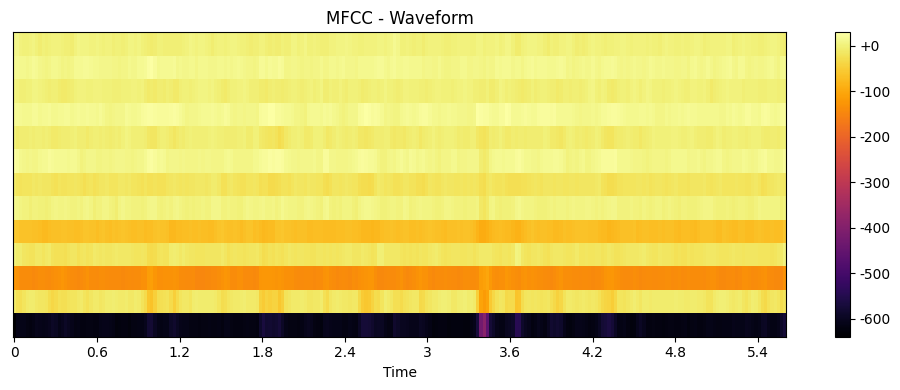

📥 Loading training and testing audio data...
✅ Loaded audio data - Train shape: (1284, 128, 128, 3), Test shape: (322, 128, 128, 3)


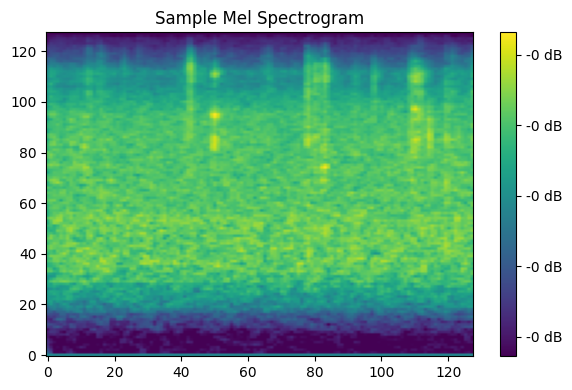

<ipython-input-3-77a3a6af537b>:100: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, input_tensor=audio_input, weights="imagenet")


🚀 Training model...
Epoch 1/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 72s 339ms/step - accuracy: 0.7627 - loss: 0.4030 - val_accuracy: 0.7702 - val_loss: 0.4650
Epoch 2/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9841 - loss: 0.0574 - val_accuracy: 0.4845 - val_loss: 0.8546
Epoch 3/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9943 - loss: 0.0250 - val_accuracy: 0.2547 - val_loss: 2.0132
Epoch 4/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9973 - loss: 0.0132 - val_accuracy: 0.3727 - val_loss: 1.4351
Epoch 5/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9874 - loss: 0.0238 - val_accuracy: 0.5683 - val_loss: 0.8236


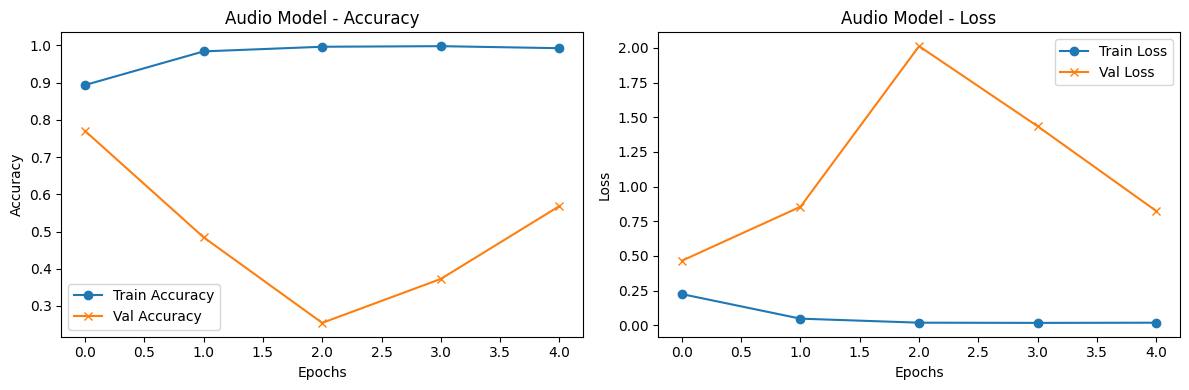

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 290ms/step

📊 Audio Model Evaluation:
              precision    recall  f1-score   support

        nrpw       0.52      0.99      0.68        80
         rpw       0.99      0.70      0.82       242

    accuracy                           0.77       322
   macro avg       0.76      0.84      0.75       322
weighted avg       0.88      0.77      0.79       322



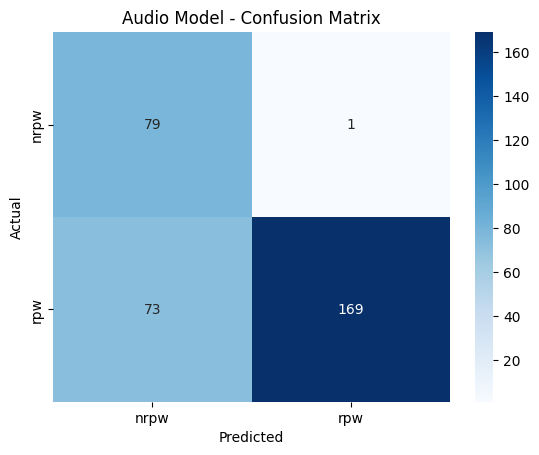


✅ Final Training Accuracy: 0.9922
✅ Final Validation Accuracy: 0.5683
📉 Final Training Loss: 0.0178
📉 Final Validation Loss: 0.8236

💾 Model saved to: /content/drive/MyDrive/yolov9c/audio_model.keras


In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# ---------------------- Paths ----------------------
TRAIN_AUDIO_DIR = "/content/drive/MyDrive/rpw_dataset/sound python/train"
TEST_AUDIO_DIR = "/content/drive/MyDrive/rpw_dataset/sound python/test"
AUDIO_MODEL_PATH = "/content/drive/MyDrive/yolov9c/audio_model.keras"
VALID_AUDIO_EXTENSIONS = (".wav", ".mp3", ".flac", ".ogg", ".m4a")

# ---------------------- Audio Feature Extraction ----------------------
def extract_audio_features(file_path, max_pad_len=128):
    try:
        audio, sr = librosa.load(file_path, sr=22050)
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        if mel_spec_db.shape[1] < max_pad_len:
            mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, max_pad_len - mel_spec_db.shape[1])), mode="constant")
        else:
            mel_spec_db = mel_spec_db[:, :max_pad_len]
        return mel_spec_db
    except Exception as e:
        print(f"❌ Error processing {file_path}: {e}")
        return None

# ---------------------- Visualize MFCC ----------------------
def plot_mfcc_waveform(file_path):
    audio, sr = librosa.load(file_path, sr=22050)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='inferno')
    plt.colorbar(format='%+2.0f')
    plt.title("MFCC - Waveform")
    plt.tight_layout()
    plt.show()

# 🔍 Display MFCC for one sample
sample_path = None
for label in ["rpw", "nrpw"]:
    dir_path = os.path.join(TRAIN_AUDIO_DIR, label)
    for file in os.listdir(dir_path):
        if file.lower().endswith(VALID_AUDIO_EXTENSIONS):
            sample_path = os.path.join(dir_path, file)
            break
    if sample_path: break

if sample_path:
    print(f"🔍 Showing MFCC waveform for: {sample_path}")
    plot_mfcc_waveform(sample_path)
else:
    print("⚠️ No audio file found for MFCC visualization.")

# ---------------------- Load Dataset ----------------------
def load_audio_data(directory):
    X_mel, y = [], []
    for label in ["rpw", "nrpw"]:
        class_dir = os.path.join(directory, label)
        for file in os.listdir(class_dir):
            if file.lower().endswith(VALID_AUDIO_EXTENSIONS):
                path = os.path.join(class_dir, file)
                mel = extract_audio_features(path)
                if mel is not None:
                    mel = np.repeat(mel[..., np.newaxis], 3, axis=-1) / 255.0
                    X_mel.append(mel)
                    y.append(label)
    return np.array(X_mel), np.array(y)

print("📥 Loading training and testing audio data...")
X_audio_train, y_audio_train = load_audio_data(TRAIN_AUDIO_DIR)
X_audio_test, y_audio_test = load_audio_data(TEST_AUDIO_DIR)
print(f"✅ Loaded audio data - Train shape: {X_audio_train.shape}, Test shape: {X_audio_test.shape}")

# ---------------------- Visualize Mel Spectrogram ----------------------
plt.figure(figsize=(6, 4))
plt.imshow(X_audio_train[0][:, :, 0], aspect='auto', origin='lower', cmap='viridis')
plt.title("Sample Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# ---------------------- Encode Labels ----------------------
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_audio_train)
y_test = label_encoder.transform(y_audio_test)

# ---------------------- Build Model ----------------------
audio_input = Input(shape=(128, 128, 3))
base_model = MobileNetV2(include_top=False, input_tensor=audio_input, weights="imagenet")
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation="sigmoid")(x)
audio_model = Model(inputs=audio_input, outputs=output)
audio_model.compile(optimizer=Adam(1e-4), loss="binary_crossentropy", metrics=["accuracy"])

# ---------------------- Class Weights ----------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# ---------------------- Callbacks ----------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ---------------------- Train Model ----------------------
print("🚀 Training model...")
history = audio_model.fit(
    X_audio_train, y_train,
    epochs=5,
    batch_size=16,
    validation_data=(X_audio_test, y_test),
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)

# ---------------------- Plot Training Results ----------------------
def plot_training_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
    plt.title(f"{title} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_training_history(history, "Audio Model")

# ---------------------- Evaluate Model ----------------------
def evaluate_model(model, X, y_true, name=""):
    y_prob = model.predict(X)
    y_pred = (y_prob > 0.5).astype(int)
    print(f"\n📊 {name} Evaluation:")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model(audio_model, X_audio_test, y_test, name="Audio Model")

# ---------------------- Final Results ----------------------
print(f"\n✅ Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"✅ Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"📉 Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"📉 Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

# ---------------------- Save Model ----------------------
audio_model.save(AUDIO_MODEL_PATH)
print(f"\n💾 Model saved to: {AUDIO_MODEL_PATH}")


✅ A/D conversion: Audio loaded


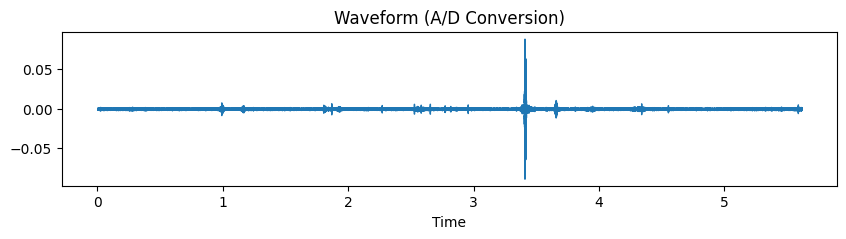

✅ Pre-emphasis applied


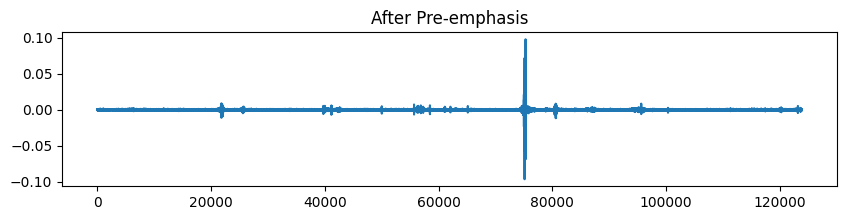

✅ Framing and Windowing done


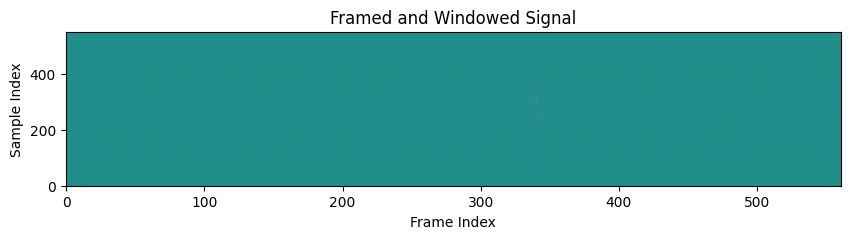

✅ DFT and Power Spectrum calculated
✅ Mel filterbank applied


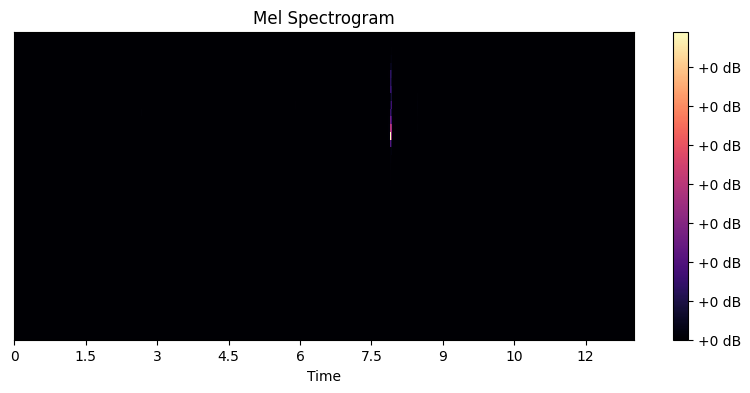

✅ log(Mel energies) calculated
✅ IDFT (DCT) to get MFCCs


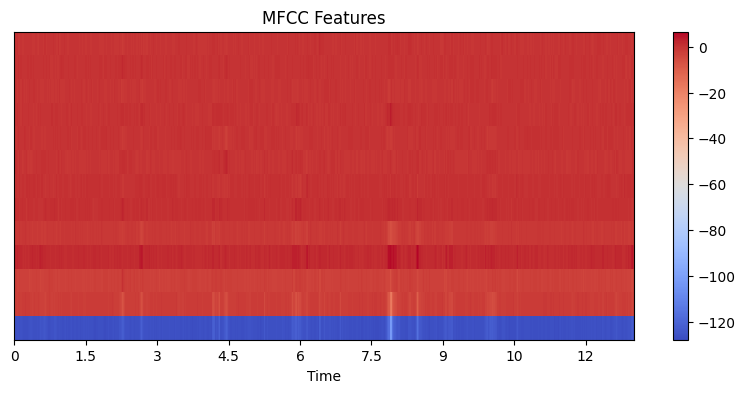

✅ Dynamic features (Δ and ΔΔ) extracted


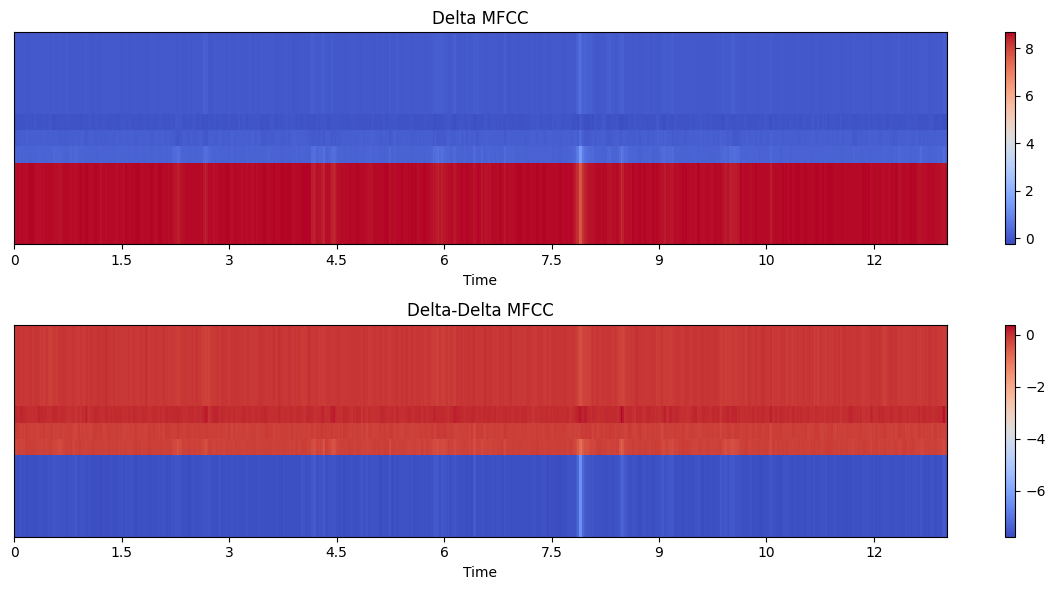

✅ Final Feature Transform complete
Final feature shape: (561, 39)


In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

# ---------------------- Paths ----------------------
TRAIN_AUDIO_DIR = "/content/drive/MyDrive/rpw_dataset/sound python/train"
TEST_AUDIO_DIR = "/content/drive/MyDrive/rpw_dataset/sound python/test"
AUDIO_MODEL_PATH = "/content/drive/MyDrive/yolov9c/audio_model.keras"

# ---------------- Audio Processing ----------------
VALID_AUDIO_EXTENSIONS = (".wav", ".mp3", ".flac", ".ogg", ".m4a")

def extract_audio_features(file_path, max_pad_len=128):
    try:
        audio, sr = librosa.load(file_path, sr=22050)
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, max_pad_len - mel_spec_db.shape[1])), mode="constant") \
                     if mel_spec_db.shape[1] < max_pad_len else mel_spec_db[:, :max_pad_len]
        return mel_spec_db
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# ---------------- MFCC Visualization ----------------
def plot_mfcc_waveform(file_path):
    audio, sr = librosa.load(file_path, sr=22050)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='inferno')  # 🌈 Better color contrast
    plt.colorbar(format='%+2.0f')
    plt.title("MFCC - Waveform")
    plt.tight_layout()
    plt.show()

# 🔍 Display MFCC of first audio sample
sample_path = None
for label in ["rpw", "nrpw"]:
    dir_path = os.path.join(TRAIN_AUDIO_DIR, label)
    for file in os.listdir(dir_path):
        if file.lower().endswith(VALID_AUDIO_EXTENSIONS):
            sample_path = os.path.join(dir_path, file)
            break
    if sample_path: break

if sample_path:
    print(f"Showing MFCC waveform for: {sample_path}")
    plot_mfcc_waveform(sample_path)
else:
    print("No audio file found to visualize MFCC.")

# ---------------- Load Data ----------------
def load_audio_data(directory):
    X_mel, y = [], []
    for label in ["rpw", "nrpw"]:
        class_dir = os.path.join(directory, label)
        for file in os.listdir(class_dir):
            if file.lower().endswith(VALID_AUDIO_EXTENSIONS):
                path = os.path.join(class_dir, file)
                mel = extract_audio_features(path)
                if mel is not None:
                    mel = np.repeat(mel[..., np.newaxis], 3, axis=-1) / 255.0
                    X_mel.append(mel)
                    y.append(label)
    return np.array(X_mel), np.array(y)

X_audio_train, y_audio_train = load_audio_data(TRAIN_AUDIO_DIR)
X_audio_test, y_audio_test = load_audio_data(TEST_AUDIO_DIR)

print(f"Train shape: {X_audio_train.shape}, Test shape: {X_audio_test.shape}")

# ---------------- Visualize Mel Spectrogram ----------------
plt.figure(figsize=(6, 4))
plt.imshow(X_audio_train[0][:, :, 0], aspect='auto', origin='lower', cmap='viridis')
plt.title("Sample Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# ---------------- Label Encoding ----------------
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_audio_train)
y_test = label_encoder.transform(y_audio_test)

# ---------------- Model ----------------
audio_input = Input(shape=(128, 128, 3))
audio_base = MobileNetV2(include_top=False, input_tensor=audio_input, weights="imagenet")
x_audio = GlobalAveragePooling2D()(audio_base.output)
x_audio = Dense(64, activation='relu')(x_audio)
x_audio = Dropout(0.3)(x_audio)
audio_output = Dense(1, activation="sigmoid")(x_audio)
audio_model = Model(audio_input, audio_output)
audio_model.compile(optimizer=Adam(1e-4), loss="binary_crossentropy", metrics=["accuracy"])

# ---------------- Class Weights ----------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# ---------------- Callback ----------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ---------------- Train ----------------
history_audio = audio_model.fit(
    X_audio_train, y_train,
    epochs=5,
    batch_size=16,
    validation_data=(X_audio_test, y_test),
    callbacks=[early_stop],
    class_weight=class_weights_dict
)

# ---------------- Plot ----------------
def plot_training_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc', marker='o')
    plt.plot(history.history['val_accuracy'], label='Val Acc', marker='x')
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
    plt.title(f"{title} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_training_history(history_audio, "Audio Model")

# ---------------- Evaluation ----------------
def evaluate_model(model, X, y_true, name=""):
    y_prob = model.predict(X)
    y_pred = (y_prob > 0.5).astype(int)
    print(f"\n{name} Evaluation:")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model(audio_model, X_audio_test, y_test, name="Audio")

# ---------------- Final Results ----------------
print(f"\n📊 Final Training Accuracy: {history_audio.history['accuracy'][-1]:.4f}")
print(f"📊 Final Validation Accuracy: {history_audio.history['val_accuracy'][-1]:.4f}")
print(f"📉 Final Training Loss: {history_audio.history['loss'][-1]:.4f}")
print(f"📉 Final Validation Loss: {history_audio.history['val_loss'][-1]:.4f}")

# ---------------- Save ----------------
audio_model.save(AUDIO_MODEL_PATH)
print(f"\n✅ Audio model saved to: {AUDIO_MODEL_PATH}")


Class Distribution: {'rpw': 236, 'nrpw': 76}
Found 250 images belonging to 2 classes.
Found 62 images belonging to 2 classes.
Class Weights: {0: np.float64(2.0491803278688523), 1: np.float64(0.6613756613756614)}

Visualizing Keypoints (AKAZE with Low-Pass Filter):


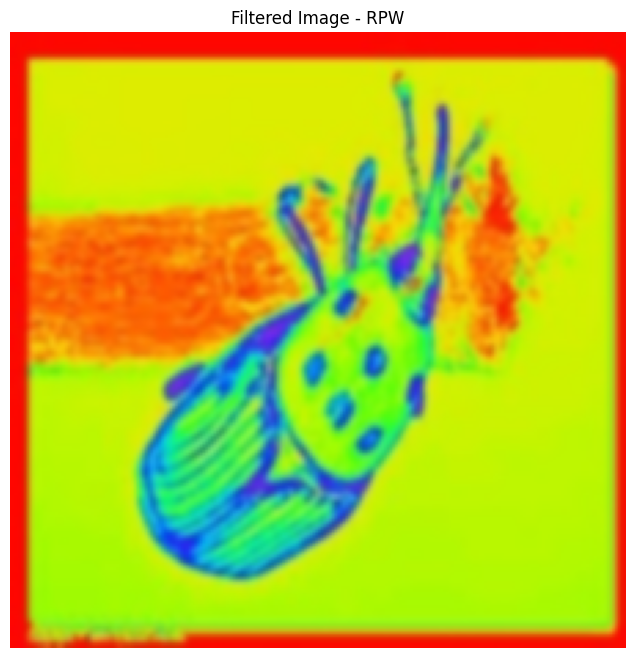

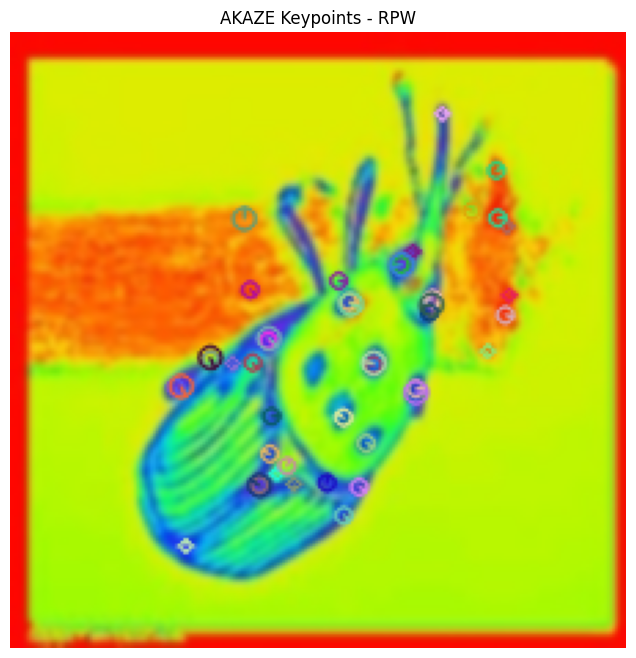

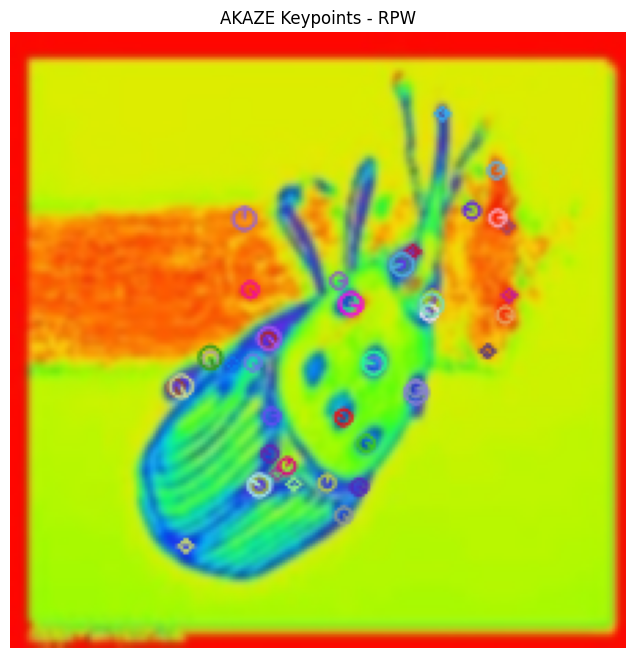


Matching Features (AKAZE with Low-Pass Filter):


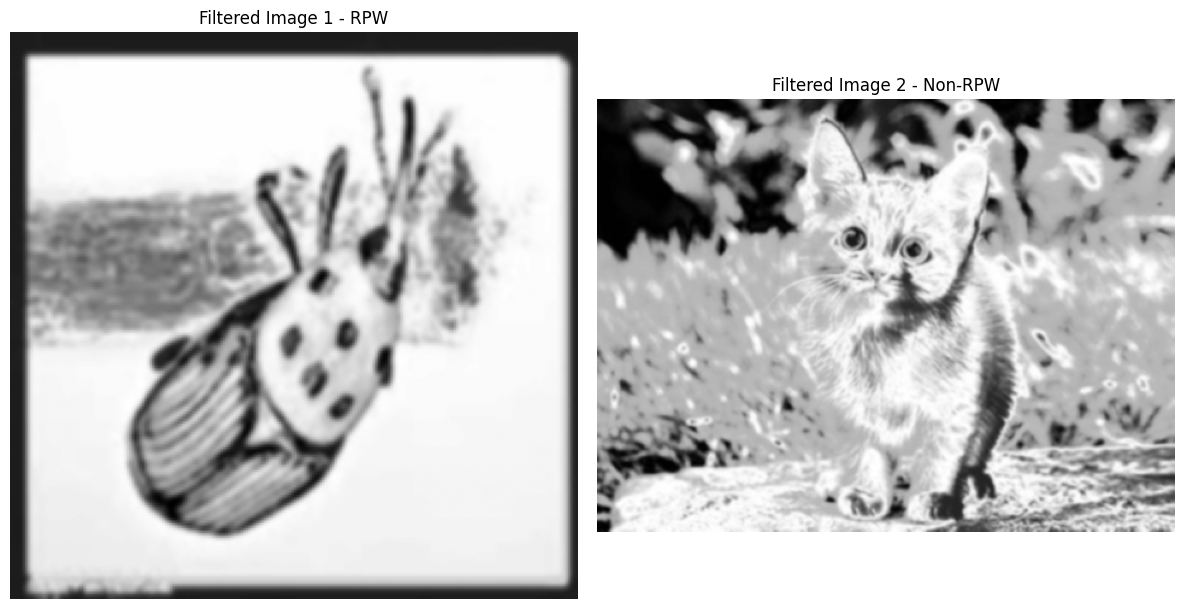

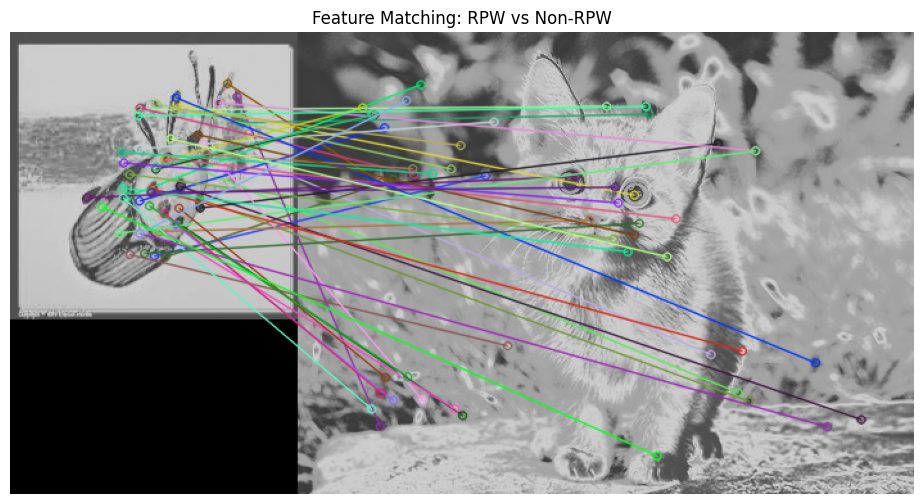

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5847 - loss: 0.7896

8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.5878 - loss: 0.7862 - val_accuracy: 0.6774 - val_loss: 0.6682
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.6713 - loss: 0.7468

8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6718 - loss: 0.7486 - val_accuracy: 0.7903 - val_loss: 0.5670
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 774ms/step - accuracy: 0.7809 - loss: 0.5491 - val_accuracy: 0.7419 - val_loss: 0.4997
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 908ms/step - accuracy: 0.7769 - loss: 0.5045 - val_accuracy: 0.7903 - val_loss: 0.5695
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 719ms/step - accuracy: 0.7772 - loss: 0.4644 - val_accuracy: 0.7581 - val_loss: 0.8579
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.7923 - loss: 0.5906

8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7882 - loss: 0.5834 - val_accuracy: 0.8548 - val_loss: 0.5428
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 955ms/step - accuracy: 0.8606 - loss: 0.3580 - val_accuracy: 0.8387 - val_loss: 0.5103
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 730ms/step - accuracy: 0.8291 - loss: 0.3232 - val_accuracy: 0.8387 - val_loss: 0.5201


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - accuracy: 0.7977 - loss: 0.3634
Validation Loss: 0.4042736887931824, Validation Accuracy: 0.7903226017951965


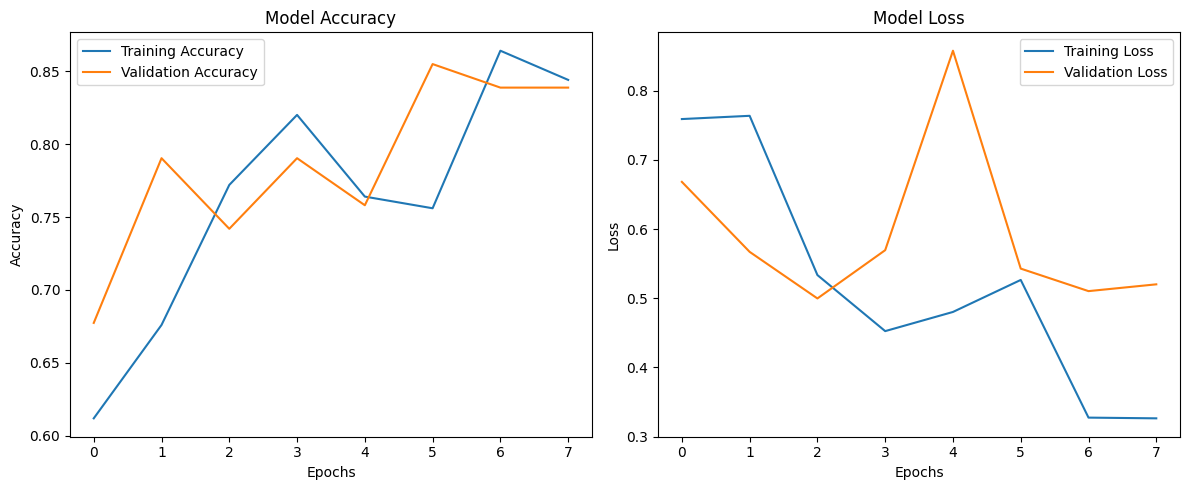

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 694ms/step

Classification Report:
              precision    recall  f1-score   support

        nrpw       0.21      0.20      0.21        15
         rpw       0.75      0.77      0.76        47

    accuracy                           0.63        62
   macro avg       0.48      0.48      0.48        62
weighted avg       0.62      0.63      0.62        62



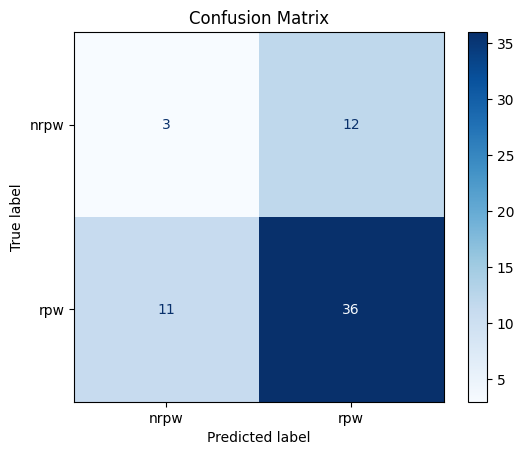

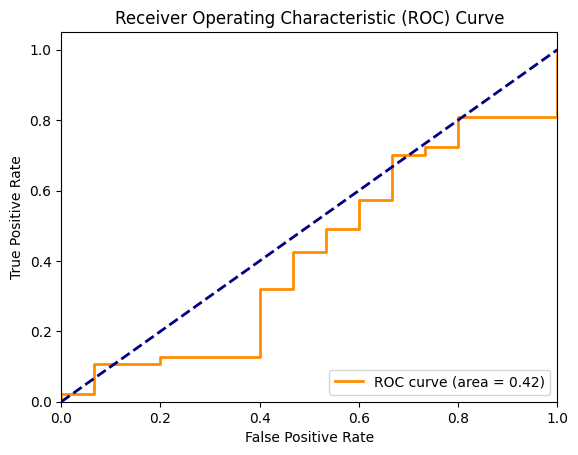

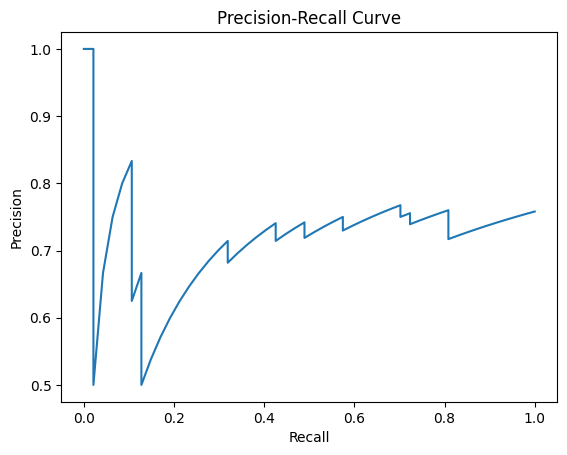

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Paths
dataset_dir ="/content/drive/MyDrive/rpw_dataset/newpython"   # Replace with your dataset directory
model_save_path = 'balanced_rpw_model.h5'  # Path to save the model

# Check class distribution
class_counts = {
    cls: len(os.listdir(os.path.join(dataset_dir, 'train', cls)))
    for cls in os.listdir(os.path.join(dataset_dir, 'train'))
    if os.path.isdir(os.path.join(dataset_dir, 'train', cls))
}
print("Class Distribution:", class_counts)

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,brightness_range=[0.8, 1.2],
    channel_shift_range=20.0
)

train_generator = datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Feature Extraction and Matching using AKAZE with Low-Pass Filter

def apply_low_pass_filter(image, kernel_size=(5, 5)):
    """
    Apply a Gaussian low-pass filter (blur) to the input image.
    """
    return cv2.GaussianBlur(image, kernel_size, 0)

def visualize_keypoints_akaze(image_path, label):
    """
    Visualize AKAZE keypoints on an input image with its label after applying a low-pass filter.
    """
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply low-pass filter (Gaussian Blur)
    image_filtered = apply_low_pass_filter(image_rgb)

    # Show the filtered image
    plt.figure(figsize=(8, 8))
    plt.imshow(image_filtered)
    plt.title(f"Filtered Image - {label}")
    plt.axis('off')
    plt.show()

    # Extract keypoints using AKAZE
    akaze = cv2.AKAZE_create()
    keypoints, _ = akaze.detectAndCompute(image_filtered, None)

    # Draw keypoints on the image
    keypoint_image = cv2.drawKeypoints(image_filtered, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display the image with keypoints and its label
    plt.figure(figsize=(8, 8))
    plt.imshow(keypoint_image)
    plt.title(f"AKAZE Keypoints - {label}")
    plt.axis('off')
    plt.show()
    # Extract keypoints using AKAZE
    akaze = cv2.AKAZE_create()
    keypoints, _ = akaze.detectAndCompute(image_filtered, None)

    # Draw keypoints on the image
    keypoint_image = cv2.drawKeypoints(image_filtered, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display the image with keypoints and its label
    plt.figure(figsize=(8, 8))
    plt.imshow(keypoint_image)
    plt.title(f"AKAZE Keypoints - {label}")
    plt.axis('off')
    plt.show()

def match_features_akaze(image_path1, image_path2, label1, label2):
    """
    Match features between two images using AKAZE after applying a low-pass filter and display the matches with their labels.
    """
    # Load and preprocess images
    image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    # Apply low-pass filter (Gaussian Blur)
    image1_filtered = apply_low_pass_filter(image1)
    image2_filtered = apply_low_pass_filter(image2)

    # Show the filtered images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image1_filtered, cmap='gray')
    plt.title(f"Filtered Image 1 - {label1}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image2_filtered, cmap='gray')
    plt.title(f"Filtered Image 2 - {label2}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Initialize AKAZE detector
    akaze = cv2.AKAZE_create()

    # Detect and compute descriptors
    keypoints1, descriptors1 = akaze.detectAndCompute(image1_filtered, None)
    keypoints2, descriptors2 = akaze.detectAndCompute(image2_filtered, None)

    # Perform feature matching using BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)  # Sort matches by distance

    # Draw matches
    match_image = cv2.drawMatches(
        image1, keypoints1, image2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    # Display the match image with labels
    plt.figure(figsize=(12, 6))
    plt.imshow(match_image)
    plt.title(f"Feature Matching: {label1} vs {label2}")
    plt.axis('off')
    plt.show()

# Example usage
sample_image_path1 = os.path.join(dataset_dir, 'train', 'rpw', os.listdir(os.path.join(dataset_dir, 'train', 'rpw'))[0])
sample_image_path2 = os.path.join(dataset_dir, 'train', 'nrpw', os.listdir(os.path.join(dataset_dir, 'train', 'nrpw'))[0])

print("\nVisualizing Keypoints (AKAZE with Low-Pass Filter):")
visualize_keypoints_akaze(sample_image_path1, label="RPW")

print("\nMatching Features (AKAZE with Low-Pass Filter):")
match_features_akaze(sample_image_path1, sample_image_path2, label1="RPW", label2="Non-RPW")

# Load Pretrained VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add Custom Layers
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_counts), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the Model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

# Train with callbacks
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    class_weight=class_weights,
    callbacks=[early_stop, checkpoint]
)

# Save the Model
model.save(model_save_path)

# Evaluate the Model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")

# Plot Accuracy and Loss Graphs
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Classification Report and Confusion Matrix
true_labels = validation_generator.classes
predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=validation_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(validation_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
# Calculate and Plot ROC Curve and AUC
if len(class_counts) == 2:  # Binary classification
    y_true = np.array(true_labels)
    y_scores = predictions[:, 1]  # Probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_true, y_scores)
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


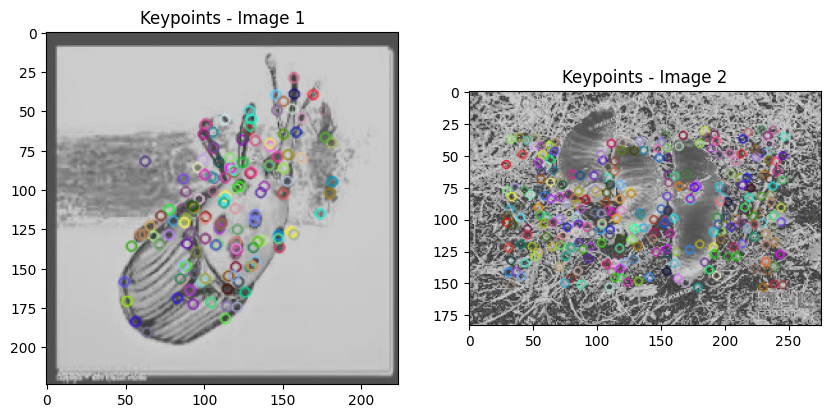

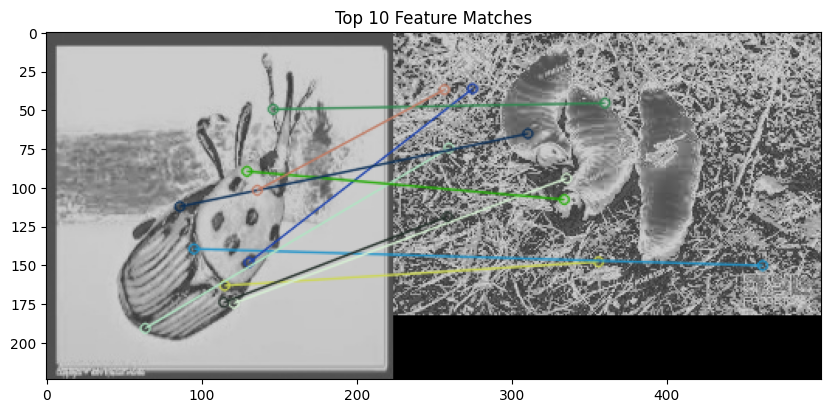

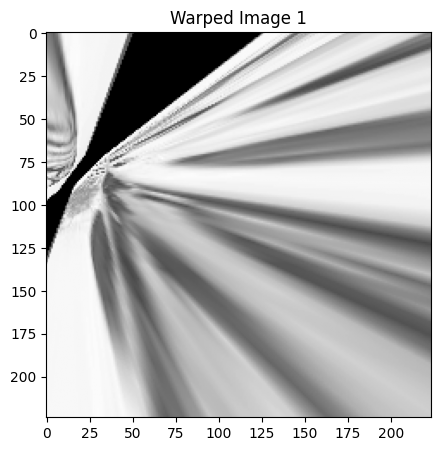

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Input Image Acquisition
img1 = cv2.imread('/content/1 (18) copy.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/drive/MyDrive/rpw_dataset/newpython/train/nrpw/12.jpg', cv2.IMREAD_GRAYSCALE)

# Check if images are loaded properly
if img1 is None or img2 is None:
    print("Error loading images!")
    exit()

# Step 2: Contrast Threshold Calculation
# AKAZE uses a nonlinear scale space, which involves calculating contrast thresholds.
# This is handled internally by the AKAZE detector, so we don't need to implement it manually.

# Step 3: Nonlinear Scale Space Construction
# AKAZE constructs a nonlinear scale space to detect features at multiple scales.
# This is also handled internally by the AKAZE detector.

# Step 4: Keypoint Detection
akaze = cv2.AKAZE_create()
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

# Visualize keypoints
img1_kp = cv2.drawKeypoints(img1, kp1, None)
img2_kp = cv2.drawKeypoints(img2, kp2, None)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1_kp)
plt.title('Keypoints - Image 1')
plt.subplot(1, 2, 2)
plt.imshow(img2_kp)
plt.title('Keypoints - Image 2')
plt.show()

# Step 5: Orientation Assignment
# AKAZE assigns orientations to keypoints based on local image gradients.
# This is handled internally by the AKAZE detector.

# Step 6: Descriptor Generation
# AKAZE generates binary descriptors for each keypoint.
# This is handled internally by the AKAZE detector.

# Step 7: Feature Matching
# Use Brute Force Matcher with Hamming distance to find the best matches between descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Visualize matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10, 5))
plt.imshow(img_matches)
plt.title('Top 10 Feature Matches')
plt.show()

# Step 8: Homography Estimation
if len(matches) > 4:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Step 9: Image Alignment and Blending
    h, w = img1.shape
    img1_warped = cv2.warpPerspective(img1, M, (w, h))

    # Visualize warped image
    plt.figure(figsize=(10, 5))
    plt.imshow(img1_warped, cmap='gray')
    plt.title('Warped Image 1')
    plt.show()
else:
    print("Not enough matches found for homography estimation.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step
Predicted class: nrpw (96.12% confidence)


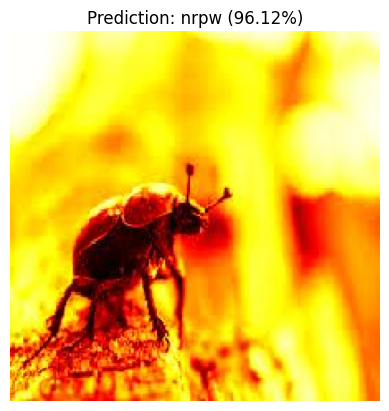

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# === Load the saved model ===
model_path = "balanced_rpw_model.h5"
model = load_model(model_path)

# === Load and preprocess a single image ===
img_path = "/content/images (19) - Copy - Copy.jpg"  # Change to your test image path

img = image.load_img(img_path, target_size=(224, 224))  # Load and resize
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize

# === Predict ===
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
confidence = prediction[0][predicted_class]

# === Class labels (same as training generator order) ===
class_indices = {'nrpw': 0, 'rpw': 1}
inv_class_indices = {v: k for k, v in class_indices.items()}
predicted_label = inv_class_indices[predicted_class]

# === Output ===
print(f"Predicted class: {predicted_label} ({confidence*100:.2f}% confidence)")

# === Optional: Show the image ===
plt.imshow(img)
plt.title(f"Prediction: {predicted_label} ({confidence*100:.2f}%)")
plt.axis('off')
plt.show()


<ipython-input-4-8d4ff94722fc>:82: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  audio_base = MobileNetV2(include_top=False, input_tensor=audio_input, weights="imagenet")


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 641s 32s/step - accuracy: 0.5491 - loss: 0.7363 - val_accuracy: 0.8133 - val_loss: 0.4714
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 638s 32s/step - accuracy: 0.6727 - loss: 0.6191 - val_accuracy: 0.8133 - val_loss: 0.4119
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 677s 32s/step - accuracy: 0.7039 - loss: 0.5596 - val_accuracy: 0.7867 - val_loss: 0.5061
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 681s 32s/step - accuracy: 0.7367 - loss: 0.4821 - val_accuracy: 0.8267 - val_loss: 0.3449
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 631s 32s/step - accuracy: 0.7282 - loss: 0.5002 - val_accuracy: 0.7600 - val_loss: 0.4400
Epoch 1/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 126s 970ms/step - accuracy: 0.8106 - loss: 0.4030 - val_accuracy: 0.3292 - val_loss: 1.1965
Epoch 2/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 77s 947ms/step - accuracy: 0.9900 - loss: 0.0442 - val_accuracy: 0.7267 - val_loss: 0.5232
Epoch 3/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 80s 925ms/step - accuracy: 0.9918 - loss: 0.0294 - val_accuracy: 0.3292

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 636s 32s/step - accuracy: 0.7441 - loss: 0.4881 - val_accuracy: 0.8000 - val_loss: 0.3103
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 632s 32s/step - accuracy: 0.7739 - loss: 0.5198 - val_accuracy: 0.8933 - val_loss: 0.2698
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 635s 32s/step - accuracy: 0.7151 - loss: 0.5639 - val_accuracy: 0.8800 - val_loss: 0.2584
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 631s 32s/step - accuracy: 0.7837 - loss: 0.4520 - val_accuracy: 0.8933 - val_loss: 0.2413
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 685s 33s/step - accuracy: 0.8273 - loss: 0.3415 - val_accuracy: 0.8400 - val_loss: 0.2874


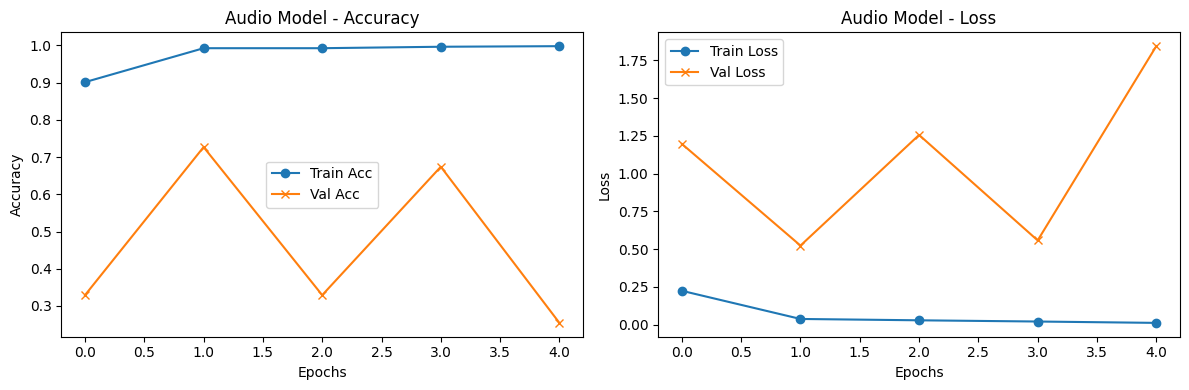

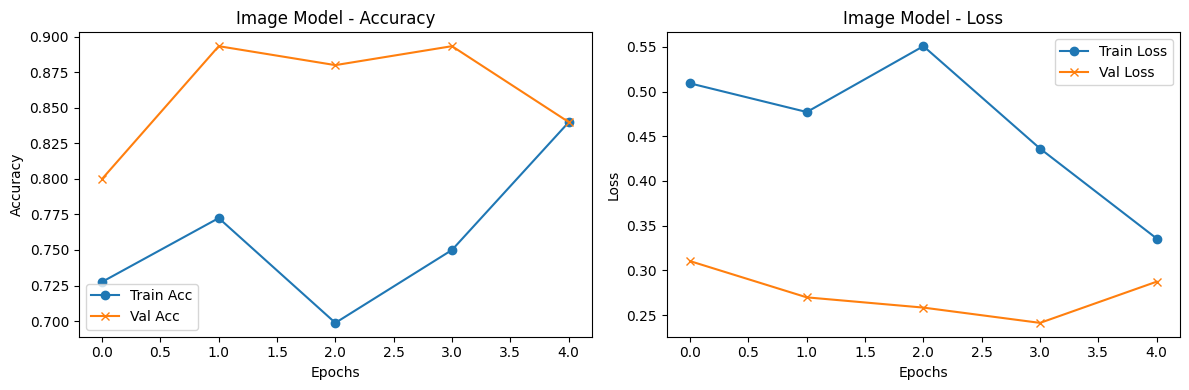

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 441ms/step

📊 Audio Evaluation:
              precision    recall  f1-score   support

        nrpw       0.47      0.78      0.58        80
         rpw       0.91      0.71      0.80       242

    accuracy                           0.73       322
   macro avg       0.69      0.74      0.69       322
weighted avg       0.80      0.73      0.74       322



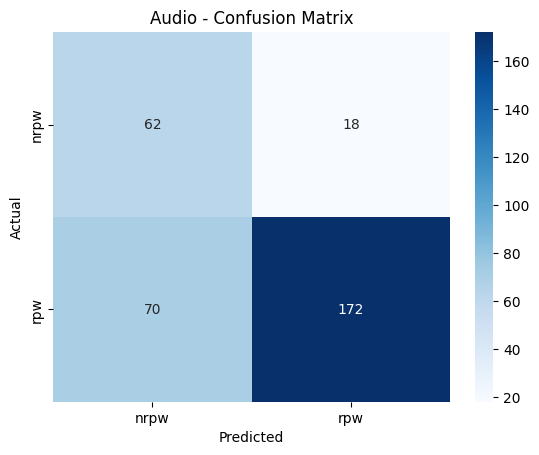

3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 12s/step

📊 Image Evaluation:
              precision    recall  f1-score   support

        nrpw       0.75      0.75      0.75        16
         rpw       0.93      0.93      0.93        59

    accuracy                           0.89        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.89      0.89      0.89        75



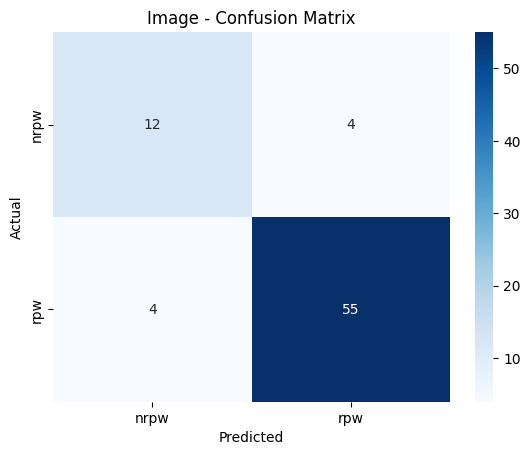

✅ Audio model saved to: /content/drive/MyDrive/rpw_dataset/audio_model.keras
✅ Image model saved to: /content/drive/MyDrive/rpw_dataset/image_model.keras


In [ ]:
import os
import numpy as np
import librosa
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ---------------------- Paths ----------------------
TRAIN_AUDIO_DIR = "/content/drive/MyDrive/rpw_dataset/sound python/train"
TEST_AUDIO_DIR = "/content/drive/MyDrive/rpw_dataset/sound python/test"
TRAIN_IMG_DIR = "/content/drive/MyDrive/rpw_dataset/newpython/train"
TEST_IMG_DIR = "/content/drive/MyDrive/rpw_dataset/newpython/test"

# ---------------- Audio Processing ----------------
VALID_AUDIO_EXTENSIONS = (".wav", ".mp3", ".flac", ".ogg", ".m4a")

def extract_audio_features(file_path, max_pad_len=128):
    try:
        audio, sr = librosa.load(file_path, sr=22050)
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, max_pad_len - mel_spec_db.shape[1])), mode="constant") \
                     if mel_spec_db.shape[1] < max_pad_len else mel_spec_db[:, :max_pad_len]
        return mel_spec_db
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

def load_audio_data(directory):
    X_mel, y = [], []
    for label in ["rpw", "nrpw"]:
        class_dir = os.path.join(directory, label)
        for file in os.listdir(class_dir):
            if file.lower().endswith(VALID_AUDIO_EXTENSIONS):
                path = os.path.join(class_dir, file)
                mel = extract_audio_features(path)
                if mel is not None:
                    mel = np.repeat(mel[..., np.newaxis], 3, axis=-1) / 255.0
                    X_mel.append(mel)
                    y.append(label)
    return np.array(X_mel), np.array(y)

# ---------------- Image Processing ----------------
def load_images_from_dir(directory):
    IMG_SIZE = (224, 224)
    images, labels = [], []
    for label in ["rpw", "nrpw"]:
        class_dir = os.path.join(directory, label)
        for file in os.listdir(class_dir):
            path = os.path.join(class_dir, file)
            img = cv2.imread(path)
            if img is not None:
                img = cv2.resize(img, IMG_SIZE).astype("float32") / 255.0
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# ---------------- Load Data ----------------
X_audio_train, y_audio_train = load_audio_data(TRAIN_AUDIO_DIR)
X_audio_test, y_audio_test = load_audio_data(TEST_AUDIO_DIR)
X_img_train, y_img_train = load_images_from_dir(TRAIN_IMG_DIR)
X_img_test, y_img_test = load_images_from_dir(TEST_IMG_DIR)

# ---------------- Label Encoding ----------------
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_audio_train)
y_test = label_encoder.transform(y_audio_test)

# ---------------- Models ----------------
# Audio Model
audio_input = Input(shape=(128, 128, 3))
audio_base = MobileNetV2(include_top=False, input_tensor=audio_input, weights="imagenet")
x_audio = GlobalAveragePooling2D()(audio_base.output)
x_audio = Dense(64, activation='relu')(x_audio)
x_audio = Dropout(0.3)(x_audio)
audio_output = Dense(1, activation="sigmoid")(x_audio)
audio_model = Model(audio_input, audio_output)
audio_model.compile(optimizer=Adam(1e-4), loss="binary_crossentropy", metrics=["accuracy"])


# Image Model (Updated)
image_input = Input(shape=(224, 224, 3))
image_base = VGG16(include_top=False, input_tensor=image_input, weights="imagenet")
x_img = GlobalAveragePooling2D()(image_base.output)
x_img = Dense(64, activation='relu')(x_img)
x_img = Dropout(0.3)(x_img)
image_output = Dense(1, activation="sigmoid")(x_img)
image_model = Model(image_input, image_output)
image_model.compile(optimizer=Adam(1e-4), loss="binary_crossentropy", metrics=["accuracy"])

# Encode image labels
y_img_train_encoded = label_encoder.transform(y_img_train)
y_img_test_encoded = label_encoder.transform(y_img_test)



# ---------------- Compute Class Weights ----------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_img_train_encoded), y=y_img_train_encoded)
class_weights_dict = dict(enumerate(class_weights))

img_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

img_generator = img_datagen.flow(X_img_train, y_img_train_encoded, batch_size=16)

# Train with class weights and more epochs
history_img = image_model.fit(
    X_img_train,
    y_img_train_encoded,
    epochs=5,
    batch_size=16,
    validation_data=(X_img_test, y_img_test_encoded),
    class_weight=class_weights_dict
)


# ---------------- Callbacks ----------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ---------------- Train Audio Model ----------------
history_audio = audio_model.fit(
    X_audio_train, y_train,
    epochs=5,
    batch_size=16,
    validation_data=(X_audio_test, y_test),
    callbacks=[early_stop],
    class_weight=class_weights_dict
)

# ---------------- Train Image Model ----------------
history_img = image_model.fit(
    img_generator,
    epochs=5,
    validation_data=(X_img_test, y_img_test_encoded),
    callbacks=[early_stop],
    class_weight=class_weights_dict
)


# ---------------- Plot Training History ----------------
def plot_training_history(history, title):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc', marker='o')
    plt.plot(history.history['val_accuracy'], label='Val Acc', marker='x')
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
    plt.title(f"{title} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot both models' training history
plot_training_history(history_audio, "Audio Model")
plot_training_history(history_img, "Image Model")

def evaluate_model(model, X, y_true, name=""):
    y_prob = model.predict(X)
    y_pred = (y_prob > 0.5).astype(int)

    print(f"\n📊 {name} Evaluation:")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model(audio_model, X_audio_test, y_test, name="Audio")
evaluate_model(image_model, X_img_test, y_img_test_encoded, name="Image")

# Save to Google Drive
AUDIO_MODEL_PATH = "/content/drive/MyDrive/rpw_dataset/audio_model.keras"
IMAGE_MODEL_PATH = "/content/drive/MyDrive/rpw_dataset/image_model.keras"

audio_model.save(AUDIO_MODEL_PATH)
image_model.save(IMAGE_MODEL_PATH)

audio_model.save(AUDIO_MODEL_PATH)
print(f"✅ Audio model saved to: {AUDIO_MODEL_PATH}")

image_model.save(IMAGE_MODEL_PATH)
print(f"✅ Image model saved to: {IMAGE_MODEL_PATH}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


<ipython-input-4-e6f9f2462531>:121: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-e6f9f2462531>:121: UserWarning: Glyph 128266 (\N{SPEAKER WITH THREE SOUND WAVES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128266 (\N{SPEAKER WITH THREE SOUND WAVES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


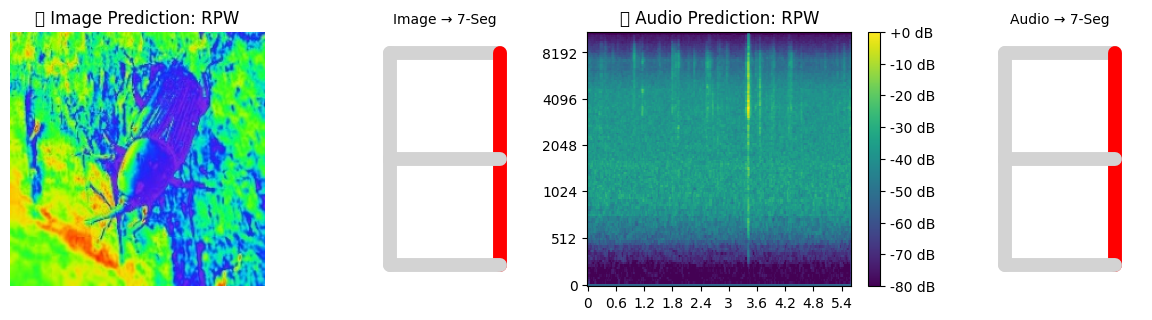


🔊 Audio Class (RPW=1, NRPW=0): 1
🖼️ Image Class (RPW=1, NRPW=0): 1


<ipython-input-4-e6f9f2462531>:147: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-e6f9f2462531>:147: UserWarning: Glyph 128266 (\N{SPEAKER WITH THREE SOUND WAVES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


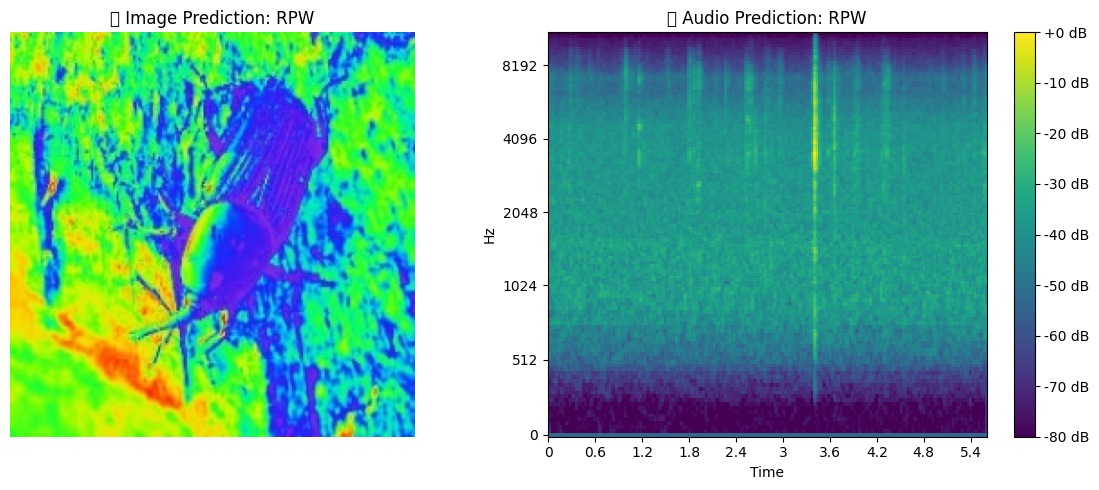

In [ ]:
import numpy as np
import librosa
import librosa.display
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
import matplotlib.gridspec as gridspec




# --------- Paths to Saved Models ---------
AUDIO_MODEL_PATH = "/content/drive/MyDrive/rpw_dataset/audio_model.keras"
IMAGE_MODEL_PATH = "/content/drive/MyDrive/rpw_dataset/image_model.keras"

# --------- Load Models ---------
audio_model = load_model(AUDIO_MODEL_PATH)
image_model = load_model(IMAGE_MODEL_PATH)

# --------- Label Mapping ---------
label_encoder = LabelEncoder()
label_encoder.fit(["nrpw", "rpw"])  # 0 = nrpw, 1 = rpw

# --------- Preprocess Audio ---------
def preprocess_single_audio(file_path, max_pad_len=128):
    audio, sr = librosa.load(file_path, sr=22050)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, max_pad_len - mel_spec_db.shape[1])), mode="constant") \
                 if mel_spec_db.shape[1] < max_pad_len else mel_spec_db[:, :max_pad_len]
    mel_spec_db = np.repeat(mel_spec_db[..., np.newaxis], 3, axis=-1) / 255.0
    return np.expand_dims(mel_spec_db, axis=0)

# --------- Preprocess Image ---------
def preprocess_single_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.resize(img, (224, 224)).astype("float32") / 255.0
    return np.expand_dims(img, axis=0)




# 7-segment simulation
def show_7_segment_sim(ax, value, title=""):
    segments = {
        '0': [1,1,1,1,1,1,0],
        '1': [0,1,1,0,0,0,0]
    }

    on = segments[str(value)]

    # Define 7 segment coordinates
    coords = [
        ((0.5, 5.5), (2.5, 5.5)),  # Top
        ((2.5, 5.5), (2.5, 3)),    # Top-right
        ((2.5, 3), (2.5, 0.5)),    # Bottom-right
        ((0.5, 0.5), (2.5, 0.5)),  # Bottom
        ((0.5, 3), (0.5, 0.5)),    # Bottom-left
        ((0.5, 5.5), (0.5, 3)),    # Top-left
        ((0.5, 3), (2.5, 3))       # Middle
    ]

    ax.set_xlim(0, 3)
    ax.set_ylim(0, 6)
    ax.axis('off')
    ax.set_title(title, fontsize=10)

    for i, ((x1, y1), (x2, y2)) in enumerate(coords):
        color = 'red' if on[i] else 'lightgray'
        ax.plot([x1, x2], [y1, y2], lw=10, color=color, solid_capstyle='round')


# Prediction + visualization
def predict_and_visualize(audio_path, image_path):
    # Preprocess
    audio_input = preprocess_single_audio(audio_path)
    image_input = preprocess_single_image(image_path)

    # Predict
    audio_pred = (audio_model.predict(audio_input)[0][0] > 0.5).astype(int)
    image_pred = (image_model.predict(image_input)[0][0] > 0.5).astype(int)

    # Decode labels
    audio_label = label_encoder.inverse_transform([audio_pred])[0]
    image_label = label_encoder.inverse_transform([image_pred])[0]

    # ----------- Combined Visualization -----------

    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(2, 4, width_ratios=[2, 1, 2, 1])

    # Image display
    ax0 = plt.subplot(gs[0])
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    ax0.imshow(img)
    ax0.set_title(f"🖼️ Image Prediction: {image_label.upper()}")
    ax0.axis("off")

    # Image 7-segment simulation
    ax1 = plt.subplot(gs[1])
    show_7_segment_sim(ax1, image_pred, title="Image → 7-Seg")

    # Audio spectrogram
    ax2 = plt.subplot(gs[2])
    audio, sr = librosa.load(audio_path, sr=22050)
    mel = librosa.feature.melspectrogram(y=audio, sr=sr)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    img_mappable = librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis', ax=ax2)
    ax2.set_title(f"🔊 Audio Prediction: {audio_label.upper()}")
    ax2.set_xlabel("")
    ax2.set_ylabel("")
    fig.colorbar(img_mappable, ax=ax2, format='%+2.0f dB')

    # Audio 7-segment simulation
    ax3 = plt.subplot(gs[3])
    show_7_segment_sim(ax3, audio_pred, title="Audio → 7-Seg")

    plt.tight_layout()
    plt.show()

    # ----------- Print Predicted Labels -----------
    print(f"\n🔊 Audio Class (RPW=1, NRPW=0): {audio_pred}")
    print(f"🖼️ Image Class (RPW=1, NRPW=0): {image_pred}")

    # --------- Visualization ---------
    plt.figure(figsize=(12, 5))

    # Show Image
    plt.subplot(1, 2, 1)
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"🖼️ Image Prediction: {image_label.upper()}")
    plt.axis("off")

    # Show Mel Spectrogram
    plt.subplot(1, 2, 2)
    audio, sr = librosa.load(audio_path, sr=22050)
    mel = librosa.feature.melspectrogram(y=audio, sr=sr)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"🔊 Audio Prediction: {audio_label.upper()}")

    plt.tight_layout()
    plt.show()


# --------- Test ---------
test_audio = "/content/20230815_004546-0convert (1)_filtered.wav"
test_image = "/content/1 (35).jpg"

predict_and_visualize(test_audio, test_image)


<ipython-input-18-2f74d267e06d>:143: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-2f74d267e06d>:143: UserWarning: Glyph 128266 (\N{SPEAKER WITH THREE SOUND WAVES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-2f74d267e06d>:143: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128266 (\N{SPEAKER WITH THREE SOUND WAVES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print

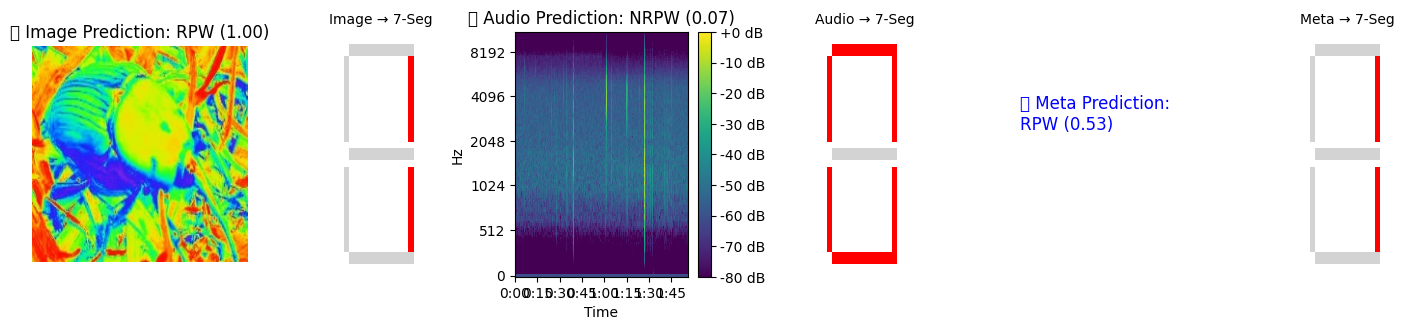


🔊 Audio Class (RPW=1, NRPW=0): 0 (0.07)
🖼️ Image Class (RPW=1, NRPW=0): 1 (1.00)
🧠 Meta Class  (RPW=1, NRPW=0): 1 (0.53)


In [ ]:
import numpy as np
import librosa
import librosa.display
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

# --------- Paths to Saved Models ---------
AUDIO_MODEL_PATH = "/content/drive/MyDrive/rpw_dataset/audio_model.keras"
IMAGE_MODEL_PATH = "/content/drive/MyDrive/rpw_dataset/image_model.keras"

# --------- Load Models ---------
audio_model = load_model(AUDIO_MODEL_PATH)
image_model = load_model(IMAGE_MODEL_PATH)

# --------- Label Encoder ---------
label_encoder = LabelEncoder()
label_encoder.fit(["nrpw", "rpw"])  # 0 = nrpw, 1 = rpw

# --------- Preprocessing Functions ---------
def preprocess_single_audio(audio_path):
    y, sr = librosa.load(audio_path, sr=22050)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Resize to (128, 128) and normalize
    mel_db_resized = cv2.resize(mel_db, (128, 128))
    mel_norm = (mel_db_resized - mel_db_resized.min()) / (mel_db_resized.max() - mel_db_resized.min())

    mel_3ch = np.stack([mel_norm]*3, axis=-1)  # Make it 3-channel
    return np.expand_dims(mel_3ch, axis=0)     # Shape: (1, 128, 128, 3)

def preprocess_single_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))  # 👈 FIXED SIZE
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_norm = img_rgb / 255.0
    return np.expand_dims(img_norm, axis=0)  # (1, 224, 224, 3)

# --------- 7-Segment Display ---------
def show_7_segment_sim(ax, pred_class, title=""):
    ax.axis("off")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    seg_pos = {
        0: (0.2, 0.9, 0.6, 0.05),
        1: (0.75, 0.55, 0.05, 0.35),
        2: (0.75, 0.1, 0.05, 0.35),
        3: (0.2, 0.05, 0.6, 0.05),
        4: (0.15, 0.1, 0.05, 0.35),
        5: (0.15, 0.55, 0.05, 0.35),
        6: (0.2, 0.475, 0.6, 0.05)
    }

    segments_on = {
        0: [0, 1, 2, 3, 4, 5],  # For 0
        1: [1, 2]               # For 1
    }

    for i in range(7):
        x, y, w, h = seg_pos[i]
        color = 'red' if i in segments_on[pred_class] else 'lightgray'
        rect = patches.Rectangle((x, y), w, h, linewidth=0, edgecolor='none', facecolor=color)
        ax.add_patch(rect)

    ax.set_title(title, fontsize=10)

# --------- Meta Prediction Strategy ---------
def meta_predict(audio_prob, image_prob, strategy="average"):
    if strategy == "average":
        combined_prob = (audio_prob + image_prob) / 2.0
    elif strategy == "weighted":
        combined_prob = (0.6 * audio_prob + 0.4 * image_prob)
    else:
        raise ValueError("Unknown strategy for meta prediction")

    return (combined_prob > 0.5).astype(int), combined_prob

# --------- Prediction and Visualization ---------
def predict_and_visualize(audio_path, image_path):
    # Preprocess
    audio_input = preprocess_single_audio(audio_path)
    image_input = preprocess_single_image(image_path)

    # Predict probabilities
    audio_prob = audio_model.predict(audio_input, verbose=0)[0][0]
    image_prob = image_model.predict(image_input, verbose=0)[0][0]

    # Binary predictions
    audio_pred = (audio_prob > 0.4).astype(int)
    image_pred = (image_prob > 0.5).astype(int)

    # Meta prediction
    meta_pred, meta_prob = meta_predict(audio_prob, image_prob)
    meta_label = label_encoder.inverse_transform([meta_pred])[0]

    # Decode individual labels
    audio_label = label_encoder.inverse_transform([audio_pred])[0]
    image_label = label_encoder.inverse_transform([image_pred])[0]

    # ----------- Combined Visualization -----------
    fig = plt.figure(figsize=(14, 6))
    gs = gridspec.GridSpec(2, 6, width_ratios=[2, 1, 2, 1, 2, 1])

    # Image display
    ax0 = plt.subplot(gs[0])
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    ax0.imshow(img)
    ax0.set_title(f"🖼️ Image Prediction: {image_label.upper()} ({image_prob:.2f})")
    ax0.axis("off")

    # Image 7-segment
    ax1 = plt.subplot(gs[1])
    show_7_segment_sim(ax1, image_pred, title="Image → 7-Seg")

    # Audio spectrogram
    ax2 = plt.subplot(gs[2])
    y, sr = librosa.load(audio_path, sr=22050)
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    img_map = librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis', ax=ax2)
    ax2.set_title(f"🔊 Audio Prediction: {audio_label.upper()} ({audio_prob:.2f})")
    fig.colorbar(img_map, ax=ax2, format='%+2.0f dB')

    # Audio 7-segment
    ax3 = plt.subplot(gs[3])
    show_7_segment_sim(ax3, audio_pred, title="Audio → 7-Seg")

    # Meta Info Text
    ax4 = plt.subplot(gs[4])
    ax4.axis("off")
    ax4.text(0.1, 0.6, f"🧠 Meta Prediction:\n{meta_label.upper()} ({meta_prob:.2f})", fontsize=12, color='blue')

    # Meta 7-segment
    ax5 = plt.subplot(gs[5])
    show_7_segment_sim(ax5, meta_pred, title="Meta → 7-Seg")

    plt.tight_layout()
    plt.show()

    # Print predictions
    print(f"\n🔊 Audio Class (RPW=1, NRPW=0): {audio_pred} ({audio_prob:.2f})")
    print(f"🖼️ Image Class (RPW=1, NRPW=0): {image_pred} ({image_prob:.2f})")
    print(f"🧠 Meta Class  (RPW=1, NRPW=0): {meta_pred} ({meta_prob:.2f})")

# --------- Run Test ---------
test_audio = "/content/20230818_004109-0_filtered - Copy (2).wav"
test_image = "/content/1 (36).jpg"

predict_and_visualize(test_audio, test_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


<ipython-input-7-67f5c458d466>:96: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-67f5c458d466>:96: UserWarning: Glyph 128266 (\N{SPEAKER WITH THREE SOUND WAVES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-67f5c458d466>:96: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128266 (\N{SPEAKER WITH THREE SOUND WAVES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figur

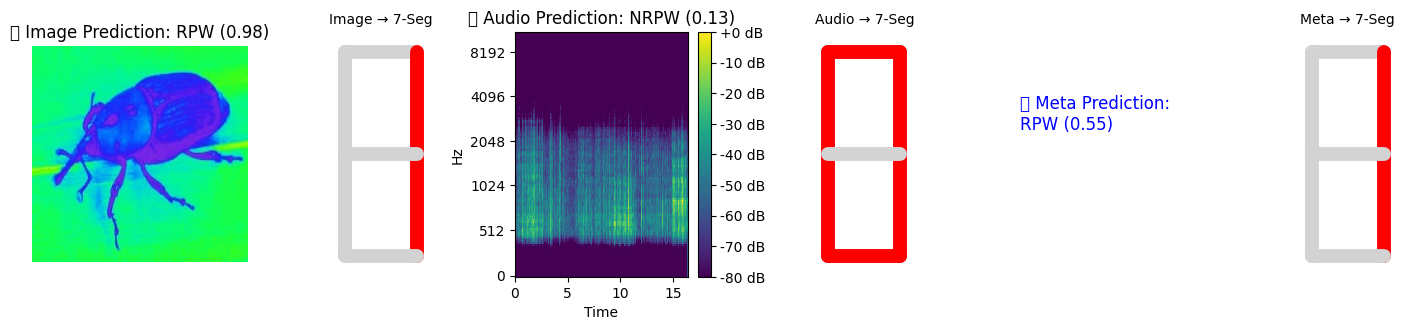


🔊 Audio Class (RPW=1, NRPW=0): 0 (0.13)
🖼️ Image Class (RPW=1, NRPW=0): 1 (0.98)
🧠 Meta Class  (RPW=1, NRPW=0): 1 (0.55)


In [ ]:
import numpy as np
import librosa
import librosa.display
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
import matplotlib.gridspec as gridspec




# --------- Paths to Saved Models ---------
AUDIO_MODEL_PATH = "/content/drive/MyDrive/rpw_dataset/audio_model.keras"
IMAGE_MODEL_PATH = "/content/drive/MyDrive/rpw_dataset/image_model.keras"

# --------- Load Models ---------
audio_model = load_model(AUDIO_MODEL_PATH)
image_model = load_model(IMAGE_MODEL_PATH)

# --------- Label Mapping ---------
label_encoder = LabelEncoder()
label_encoder.fit(["nrpw", "rpw"])  # 0 = nrpw, 1 = rpw
# --------- Meta Prediction Function ---------
def meta_predict(audio_prob, image_prob, strategy="average"):
    if strategy == "average":
        combined_prob = (audio_prob + image_prob) / 2.0
    elif strategy == "weighted":
        combined_prob = (0.6 * audio_prob + 0.4 * image_prob)  # Adjust weights as needed
    else:
        raise ValueError("Unknown strategy for meta prediction")

    return (combined_prob > 0.5).astype(int), combined_prob

# --------- Modified predict_and_visualize with Meta Prediction ---------
def predict_and_visualize(audio_path, image_path):
    # Preprocess
    audio_input = preprocess_single_audio(audio_path)
    image_input = preprocess_single_image(image_path)

    # Predict probabilities
    audio_prob = audio_model.predict(audio_input)[0][0]
    image_prob = image_model.predict(image_input)[0][0]

    # Binary predictions
    audio_pred = (audio_prob > 0.5).astype(int)
    image_pred = (image_prob > 0.5).astype(int)

    # Meta prediction
    meta_pred, meta_prob = meta_predict(audio_prob, image_prob)
    meta_label = label_encoder.inverse_transform([meta_pred])[0]

    # Decode labels
    audio_label = label_encoder.inverse_transform([audio_pred])[0]
    image_label = label_encoder.inverse_transform([image_pred])[0]

    # ----------- Combined Visualization -----------
    fig = plt.figure(figsize=(14, 6))
    gs = gridspec.GridSpec(2, 6, width_ratios=[2, 1, 2, 1, 2, 1])

    # Image display
    ax0 = plt.subplot(gs[0])
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    ax0.imshow(img)
    ax0.set_title(f"🖼️ Image Prediction: {image_label.upper()} ({image_prob:.2f})")
    ax0.axis("off")

    # Image 7-segment simulation
    ax1 = plt.subplot(gs[1])
    show_7_segment_sim(ax1, image_pred, title="Image → 7-Seg")

    # Audio spectrogram
    ax2 = plt.subplot(gs[2])
    audio, sr = librosa.load(audio_path, sr=22050)
    mel = librosa.feature.melspectrogram(y=audio, sr=sr)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    img_mappable = librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis', ax=ax2)
    ax2.set_title(f"🔊 Audio Prediction: {audio_label.upper()} ({audio_prob:.2f})")
    fig.colorbar(img_mappable, ax=ax2, format='%+2.0f dB')

    # Audio 7-segment simulation
    ax3 = plt.subplot(gs[3])
    show_7_segment_sim(ax3, audio_pred, title="Audio → 7-Seg")

    # Meta 7-segment simulation
    ax4 = plt.subplot(gs[5])
    show_7_segment_sim(ax4, meta_pred, title="Meta → 7-Seg")

    # Meta info text
    ax5 = plt.subplot(gs[4])
    ax5.axis("off")
    ax5.text(0.1, 0.6, f"🧠 Meta Prediction:\n{meta_label.upper()} ({meta_prob:.2f})", fontsize=12, color='blue')

    plt.tight_layout()
    plt.show()

    # ----------- Print Predicted Labels -----------
    print(f"\n🔊 Audio Class (RPW=1, NRPW=0): {audio_pred} ({audio_prob:.2f})")
    print(f"🖼️ Image Class (RPW=1, NRPW=0): {image_pred} ({image_prob:.2f})")
    print(f"🧠 Meta Class  (RPW=1, NRPW=0): {meta_pred} ({meta_prob:.2f})")

# --------- Test ---------
test_audio = "/content/D12-rhinostrid-3beetles - Copy (2).wav"
test_image = "/content/1 (134).jpg"

predict_and_visualize(test_audio, test_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/librosa/display.py:801: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
<ipython-input-75-6ae8c3d533f6>:63: UserWarning: Glyph 128265 (\N{SPEAKER WITH ONE SOUND WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128265 (\N{SPEAKER WITH ONE SOUND WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


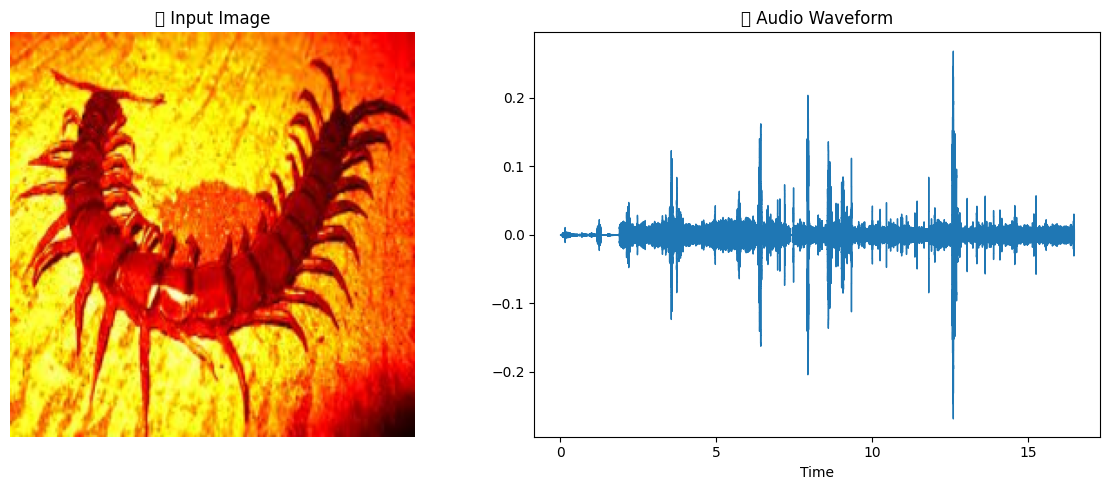

🎧 Playing audio:


🔉 Audio-only Prediction: nrpw (0.0032)
🖼️ Image-only Prediction: rpw (0.9962)
🤖 Meta Prediction: rpw (0.6445)


(np.str_('rpw'), np.float32(0.6445393))

In [ ]:
import cv2
import librosa
import librosa.display
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from tensorflow.keras.models import load_model

# Load models
audio_model = load_model("audio_model.keras", compile=False)
image_model = load_model("image_model.keras", compile=False)
# meta_model = load_model("meta_model.keras", compile=False)

# Constants
IMG_SIZE = (224, 224)
AUDIO_MAX_LEN = 128

# ----- Preprocess Image -----
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, IMG_SIZE)
    img_input = img_resized.astype("float32") / 255.0
    return np.expand_dims(img_input, axis=0), img_resized

# ----- Preprocess Audio -----
def preprocess_audio(audio_path):
    audio, sr = librosa.load(audio_path, sr=22050)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    if mel_spec_db.shape[1] < AUDIO_MAX_LEN:
        mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, AUDIO_MAX_LEN - mel_spec_db.shape[1])), mode="constant")
    else:
        mel_spec_db = mel_spec_db[:, :AUDIO_MAX_LEN]
    mel_spec_db = np.repeat(mel_spec_db[..., np.newaxis], 3, axis=-1) / 255.0
    return np.expand_dims(mel_spec_db, axis=0), audio, sr

# ----- Predict -----
def predict_rpw(image_path, audio_path):
    img_input, img_display = preprocess_image(image_path)
    audio_input, audio_wave, sr = preprocess_audio(audio_path)

    # Model predictions
    audio_logits = audio_model.predict(audio_input)[0][0]
    image_logits = image_model.predict(img_input)[0][0]
    audio_prob = tf.sigmoid(audio_logits).numpy()
    image_prob = tf.sigmoid(image_logits).numpy()
    meta_prob = meta_model.predict([audio_input, img_input])[0][0]
    meta_label = label_encoder.inverse_transform([int(meta_prob > 0.5)])[0]

    # Show image and waveform
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_display)
    plt.title("🖼️ Input Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    librosa.display.waveshow(audio_wave, sr=sr)
    plt.title("🔉 Audio Waveform")
    plt.tight_layout()
    plt.show()

    # Play audio
    print("🎧 Playing audio:")
    display(Audio(audio_path))

    # Print predictions
    print(f"🔉 Audio-only Prediction: {label_encoder.inverse_transform([int(audio_prob > 0.5)])[0]} ({audio_prob:.4f})")
    print(f"🖼️ Image-only Prediction: {label_encoder.inverse_transform([int(image_prob > 0.5)])[0]} ({image_prob:.4f})")
    print(f"🤖 Meta Prediction: {meta_label} ({meta_prob:.4f})")

    return meta_label, meta_prob

image_path = "/content/drive/MyDrive/rpw_dataset/newpython/test/nrpw/download (1).jpg"
audio_path = "/content/audio (1).mp3"
predict_rpw(image_path, audio_path)


In [ ]:
import numpy as np
import librosa
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import board
import busio
from digitalio import DigitalInOut
import adafruit_ssd1306
from PIL import Image, ImageDraw, ImageFont

# --------- OLED Setup ---------
i2c = busio.I2C(board.SCL, board.SDA)
reset_pin = DigitalInOut(board.D4)
oled = adafruit_ssd1306.SSD1306_I2C(128, 64, i2c, reset=reset_pin)
oled.fill(0)
oled.show()

# --------- Load Models ---------
AUDIO_MODEL_PATH = "/content/drive/MyDrive/rpw_dataset/audio_model.keras"
IMAGE_MODEL_PATH = "/content/drive/MyDrive/rpw_dataset/image_model.keras"

audio_model = load_model(AUDIO_MODEL_PATH)
image_model = load_model(IMAGE_MODEL_PATH)

# --------- Label Encoder ---------
label_encoder = LabelEncoder()
label_encoder.fit(["nrpw", "rpw"])  # 0 = nrpw, 1 = rpw

# --------- Preprocess Audio ---------
def preprocess_single_audio(file_path, max_pad_len=128):
    audio, sr = librosa.load(file_path, sr=22050)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, max_pad_len - mel_spec_db.shape[1])), mode="constant") \
                 if mel_spec_db.shape[1] < max_pad_len else mel_spec_db[:, :max_pad_len]
    mel_spec_db = np.repeat(mel_spec_db[..., np.newaxis], 3, axis=-1) / 255.0
    return np.expand_dims(mel_spec_db, axis=0)

# --------- Preprocess Image ---------
def preprocess_single_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.resize(img, (224, 224)).astype("float32") / 255.0
    return np.expand_dims(img, axis=0)

# --------- Prediction + OLED Display ---------
def predict_and_display_oled(audio_path, image_path):
    audio_input = preprocess_single_audio(audio_path)
    image_input = preprocess_single_image(image_path)

    audio_pred = (audio_model.predict(audio_input)[0][0] > 0.5).astype(int)
    image_pred = (image_model.predict(image_input)[0][0] > 0.5).astype(int)

    audio_label = label_encoder.inverse_transform([audio_pred])[0]
    image_label = label_encoder.inverse_transform([image_pred])[0]

    print(f"🔊 Audio Prediction: {audio_label.upper()} ({audio_pred})")
    print(f"🖼️ Image Prediction: {image_label.upper()} ({image_pred})")

    # --------- Display on OLED ---------
    oled.fill(0)
    oled.show()

    image = Image.new("1", (oled.width, oled.height))
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    draw.text((0, 0), f"Audio: {audio_pred}", font=font, fill=255)
    draw.text((0, 20), f"Image: {image_pred}", font=font, fill=255)
    draw.text((0, 45), f"A: {audio_label}", font=font, fill=255)
    draw.text((65, 45), f"I: {image_label}", font=font, fill=255)

    oled.image(image)
    oled.show()

# --------- Example Test ---------
audio_path ="/content/20230815_004546-0convert (1)_filtered - Copy - Copy.wav"  # your WAV file path on Pi
image_path = "/content/1 (86).jpg"  # your image file path on Pi

predict_and_display_oled(audio_path, image_path)


AttributeError: module 'board' has no attribute 'SCL'

In [ ]:
import os
import numpy as np
import librosa
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Concatenate, Input, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

# --------------------------
# 🛠️ Paths
# --------------------------
TRAIN_AUDIO_DIR = "/content/drive/MyDrive/rpw_dataset/sound python/train"
TEST_AUDIO_DIR = "/content/drive/MyDrive/rpw_dataset/sound python/test"
TRAIN_IMG_DIR = "/content/drive/MyDrive/rpw_dataset/newpython/train"
TEST_IMG_DIR = "/content/drive/MyDrive/rpw_dataset/newpython/test"

# --------------------------
# 🔉 Audio Feature Extraction
# --------------------------
VALID_AUDIO_EXTENSIONS = (".wav", ".mp3", ".flac", ".ogg", ".m4a")

def extract_audio_features(file_path, max_pad_len=128):
    try:
        audio, sr = librosa.load(file_path, sr=22050)
        # MFCC (not used in this example but available)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        mfcc = np.pad(mfcc, ((0, 0), (0, max_pad_len - mfcc.shape[1])), mode="constant") \
                if mfcc.shape[1] < max_pad_len else mfcc[:, :max_pad_len]
        # Mel Spectrogram (we use this one as our input)
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, max_pad_len - mel_spec_db.shape[1])), mode="constant") \
                     if mel_spec_db.shape[1] < max_pad_len else mel_spec_db[:, :max_pad_len]
        return mfcc, mel_spec_db
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None

def load_audio_data(directory):
    X_mfcc, X_mel, y = [], [], []
    for label in ["rpw", "nrpw"]:
        class_dir = os.path.join(directory, label)
        if not os.path.exists(class_dir):
            continue
        for file in os.listdir(class_dir):
            if file.lower().endswith(VALID_AUDIO_EXTENSIONS):
                file_path = os.path.join(class_dir, file)
                mfcc, mel_spec = extract_audio_features(file_path)
                if mfcc is not None and mel_spec is not None:
                    X_mfcc.append(mfcc)
                    X_mel.append(mel_spec)
                    y.append(label)
    return np.array(X_mfcc), np.array(X_mel), np.array(y)


In [ ]:
# --------------------------
# Load Audio Data
# --------------------------
X_mfcc_train, X_mel_train, y_audio_train = load_audio_data(TRAIN_AUDIO_DIR)
X_mfcc_test, X_mel_test, y_audio_test = load_audio_data(TEST_AUDIO_DIR)

# Label encoding (assumes that image and audio share the same label structure)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_audio_train)
y_test_encoded = label_encoder.transform(y_audio_test)

# Convert Mel Spectrogram to 3 Channels (for CNN) and rename to X_audio_*
X_audio_train = np.repeat(X_mel_train[..., np.newaxis], 3, axis=-1) / 255.0
X_audio_test = np.repeat(X_mel_test[..., np.newaxis], 3, axis=-1) / 255.0

# --------------------------
# 🖼️ Image Preprocessing
# --------------------------
BATCH_SIZE = 16
IMG_SIZE = (224, 224)

datagen = ImageDataGenerator(rescale=1./255)

def load_images_from_dir(directory):
    images = []
    labels = []
    # Assumes folder structure: directory/label/image.jpg
    for label in ["rpw", "nrpw"]:
        label_dir = os.path.join(directory, label)
        if not os.path.exists(label_dir):
            continue
        for file in os.listdir(label_dir):
            file_path = os.path.join(label_dir, file)
            img = cv2.imread(file_path)
            if img is None:
                continue
            img = cv2.resize(img, IMG_SIZE)
            img = img.astype("float32") / 255.0
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
X_img_train, y_img_train = load_images_from_dir(TRAIN_IMG_DIR)
X_img_test, y_img_test = load_images_from_dir(TEST_IMG_DIR)
# Encode image labels to match audio label encoding
y_img_train = label_encoder.transform(y_img_train)
y_img_test = label_encoder.transform(y_img_test)


In [ ]:
# --------------------------
# 1. Define & Train the Audio Model
# --------------------------
# Audio model with MobileNetV2 (outputs logits)
audio_input = Input(shape=(128, 128, 3), name="audio_input")
audio_base = MobileNetV2(input_tensor=audio_input, include_top=False, weights="imagenet")
audio_features = GlobalAveragePooling2D()(audio_base.output)
audio_logits = Dense(1)(audio_features)  # Logits output (no activation)
audio_model = Model(inputs=audio_input, outputs=audio_logits)

audio_model.compile(
    optimizer=Adam(1e-4),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

<ipython-input-46-0148a591e08a>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  audio_base = MobileNetV2(input_tensor=audio_input, include_top=False, weights="imagenet")


In [ ]:
# Train the audio model (using encoded labels)
audio_model.fit(
    X_audio_train,
    y_train_encoded,
    epochs=10,
    batch_size=16,
    validation_data=(X_audio_test, y_test_encoded)
)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 68s 315ms/step - accuracy: 0.7696 - loss: 0.3746 - val_accuracy: 0.2702 - val_loss: 1.2981
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.9910 - loss: 0.0294 - val_accuracy: 0.2547 - val_loss: 1.8894
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9900 - loss: 0.0315 - val_accuracy: 0.3447 - val_loss: 0.8905
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9936 - loss: 0.0165 - val_accuracy: 0.7609 - val_loss: 0.3557
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9947 - loss: 0.0193 - val_accuracy: 0.2484 - val_loss: 5.7737
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9956 - loss: 0.0099 - val_accuracy: 0.2640 - val_loss: 1.4036
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9996 - loss: 0.0053 - val_accuracy: 0.2484 - val_loss: 3.4070
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.2547 

In [ ]:
# --------------------------
# 2. Define & Train the Image Model
# --------------------------
# Image model with VGG16 (outputs logits)
image_input = Input(shape=(224, 224, 3), name="image_input")
image_base = VGG16(input_tensor=image_input, include_top=False, weights="imagenet")
image_features = Flatten()(image_base.output)
image_logits = Dense(1)(image_features)  # Logits output (no activation)
image_model = Model(inputs=image_input, outputs=image_logits)

image_model.compile(
    optimizer=Adam(1e-4),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [ ]:
# For the image model, we assume the labels in y_img_train are the same as for audio.
# You may want to encode y_img_train similarly; here, we assume they are already matching.
image_model.fit(
    X_img_train,
    y_img_train,
    epochs=10,
    batch_size=16,
    validation_data=(X_img_test, y_img_test)
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 544ms/step - accuracy: 0.5737 - loss: 0.6851 - val_accuracy: 0.8267 - val_loss: 0.3835
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 286ms/step - accuracy: 0.7937 - loss: 0.3905 - val_accuracy: 0.8000 - val_loss: 0.3578
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 290ms/step - accuracy: 0.8248 - loss: 0.3316 - val_accuracy: 0.8400 - val_loss: 0.3641
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 297ms/step - accuracy: 0.8892 - loss: 0.2218 - val_accuracy: 0.7867 - val_loss: 0.3640
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 289ms/step - accuracy: 0.8681 - loss: 0.2524 - val_accuracy: 0.8267 - val_loss: 0.3368
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 289ms/step - accuracy: 0.9560 - loss: 0.1686 - val_accuracy: 0.8267 - val_loss: 0.2772
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 286ms/step - accuracy: 0.9769 - loss: 0.0875 - val_accuracy: 0.8933 - val_loss: 0.3263
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 277ms/step - accuracy: 0.9572 - loss: 0.1184 - val_accur

In [ ]:
# --------------------------
# 3. Build and Train the Meta-Classifier
# --------------------------
# Freeze the audio and image models so their weights remain unchanged during meta-training
audio_model.trainable = False
image_model.trainable = False

# Combine the logits from both models
combined_logits = Concatenate()([audio_model.output, image_model.output])
x = Dense(64, activation="relu")(combined_logits)
x = Dropout(0.5)(x)
final_output = Dense(1, activation="sigmoid")(x)  # Final prediction layer

meta_model = Model(inputs=[audio_model.input, image_model.input], outputs=final_output)
meta_model.compile(
    optimizer=Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# --------------------------
# Match Audio Samples to Image Samples for Meta-Classifier Training
# --------------------------
# We use the number of image samples as the reference for both training and test sets.
np.random.seed(42)  # Ensure reproducibility

# For training set
num_train = X_img_train.shape[0]
if X_audio_train.shape[0] > num_train:
    train_audio_indices = np.random.choice(X_audio_train.shape[0], size=num_train, replace=False)
    X_audio_train_matched = X_audio_train[train_audio_indices]
    y_train_encoded_matched = y_train_encoded[train_audio_indices]
else:
    X_audio_train_matched = X_audio_train
    y_train_encoded_matched = y_train_encoded

# For test set
num_test = X_img_test.shape[0]
if X_audio_test.shape[0] > num_test:
    test_audio_indices = np.random.choice(X_audio_test.shape[0], size=num_test, replace=False)
    X_audio_test_matched = X_audio_test[test_audio_indices]
    y_test_encoded_matched = y_test_encoded[test_audio_indices]
else:
    X_audio_test_matched = X_audio_test
    y_test_encoded_matched = y_test_encoded

In [ ]:
# --------------------------
# Train the Meta-Classifier with Matched Data
# --------------------------
meta_model.fit(
    [X_audio_train_matched, X_img_train],
    y_train_encoded_matched,
    epochs=10,
    batch_size=16,
    validation_data=([X_audio_test_matched, X_img_test], y_test_encoded_matched)
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5139 - loss: 1.1128 - val_accuracy: 0.5200 - val_loss: 0.7038
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.4951 - loss: 1.1908 - val_accuracy: 0.5200 - val_loss: 0.6870
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.4632 - loss: 1.2099 - val_accuracy: 0.6400 - val_loss: 0.6706
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.5159 - loss: 1.1762 - val_accuracy: 0.7467 - val_loss: 0.6606
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.5248 - loss: 1.1434 - val_accuracy: 0.7467 - val_loss: 0.6523
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.4850 - loss: 1.0540 - val_accuracy: 0.7467 - val_loss: 0.6458
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.5966 - loss: 0.9934 - val_accuracy: 0.7467 - val_loss: 0.6414
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.5450 - loss: 1.0833 - val_accuracy: 0.7

In [ ]:
audio_model.save("audio_model.keras")
image_model.save("image_model.keras")
meta_model.save("meta_model.keras")

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


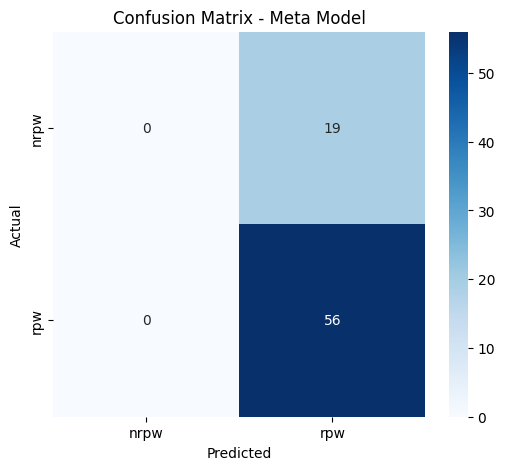

Classification Report:
               precision    recall  f1-score   support

        nrpw       0.00      0.00      0.00        19
         rpw       0.75      1.00      0.85        56

    accuracy                           0.75        75
   macro avg       0.37      0.50      0.43        75
weighted avg       0.56      0.75      0.64        75

Accuracy:  0.7467
Precision: 0.7467
Recall:    1.0000
F1 Score:  0.8550


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score
)

# Predict probabilities
y_pred_prob = meta_model.predict([X_audio_test_matched, X_img_test])
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Confusion matrix
cm = confusion_matrix(y_test_encoded_matched, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Meta Model")
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test_encoded_matched, y_pred, target_names=label_encoder.classes_))

# Additional metrics
acc = accuracy_score(y_test_encoded_matched, y_pred)
prec = precision_score(y_test_encoded_matched, y_pred)
rec = recall_score(y_test_encoded_matched, y_pred)
f1 = f1_score(y_test_encoded_matched, y_pred)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/usr/local/lib/python3.11/dist-packages/librosa/display.py:801: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
<ipython-input-66-f68e939b275a>:63: UserWarning: Glyph 128265 (\N{SPEAKER WITH ONE SOUND WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128265 (\N{SPEAKER WITH ONE SOUND WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


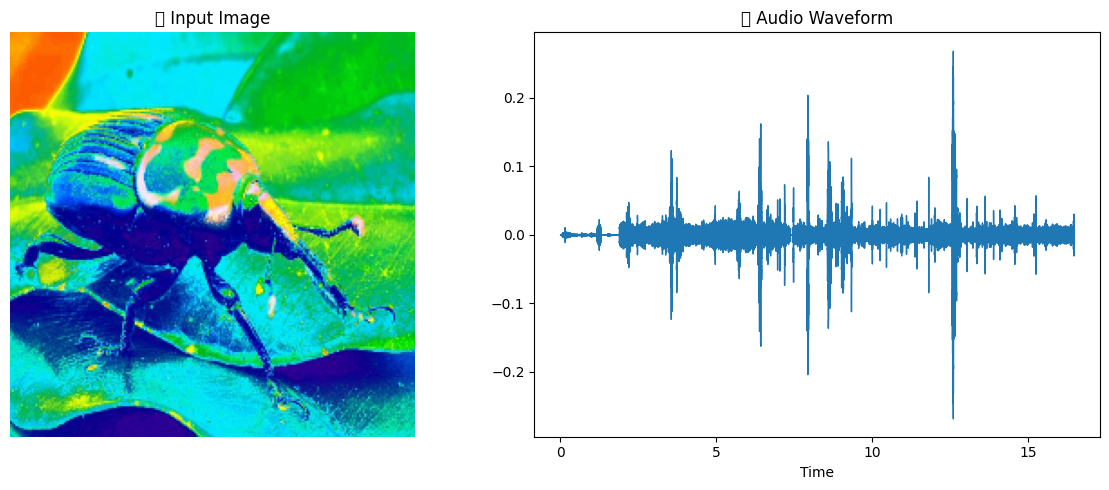

🎧 Playing audio:


🔉 Audio-only Prediction: rpw (0.6524)
🖼️ Image-only Prediction: rpw (0.7266)
🤖 Meta Prediction: rpw (0.6294)


(np.str_('rpw'), np.float32(0.62938505))

In [ ]:
import cv2
import librosa
import librosa.display
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from tensorflow.keras.models import load_model

# Load models
# audio_model = load_model("audio_model.keras", compile=False)
# image_model = load_model("image_model.keras", compile=False)
# meta_model = load_model("meta_model.keras", compile=False)

# Constants
IMG_SIZE = (224, 224)
AUDIO_MAX_LEN = 128

# ----- Preprocess Image -----
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, IMG_SIZE)
    img_input = img_resized.astype("float32") / 255.0
    return np.expand_dims(img_input, axis=0), img_resized

# ----- Preprocess Audio -----
def preprocess_audio(audio_path):
    audio, sr = librosa.load(audio_path, sr=22050)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    if mel_spec_db.shape[1] < AUDIO_MAX_LEN:
        mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, AUDIO_MAX_LEN - mel_spec_db.shape[1])), mode="constant")
    else:
        mel_spec_db = mel_spec_db[:, :AUDIO_MAX_LEN]
    mel_spec_db = np.repeat(mel_spec_db[..., np.newaxis], 3, axis=-1) / 255.0
    return np.expand_dims(mel_spec_db, axis=0), audio, sr

# ----- Predict -----
def predict_rpw(image_path, audio_path):
    img_input, img_display = preprocess_image(image_path)
    audio_input, audio_wave, sr = preprocess_audio(audio_path)

    # Model predictions
    audio_logits = audio_model.predict(audio_input)[0][0]
    image_logits = image_model.predict(img_input)[0][0]
    audio_prob = tf.sigmoid(audio_logits).numpy()
    image_prob = tf.sigmoid(image_logits).numpy()
    meta_prob = meta_model.predict([audio_input, img_input])[0][0]
    meta_label = label_encoder.inverse_transform([int(meta_prob > 0.5)])[0]

    # Show image and waveform
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_display)
    plt.title("🖼️ Input Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    librosa.display.waveshow(audio_wave, sr=sr)
    plt.title("🔉 Audio Waveform")
    plt.tight_layout()
    plt.show()

    # Play audio
    print("🎧 Playing audio:")
    display(Audio(audio_path))

    # Print predictions
    print(f"🔉 Audio-only Prediction: {label_encoder.inverse_transform([int(audio_prob > 0.5)])[0]} ({audio_prob:.4f})")
    print(f"🖼️ Image-only Prediction: {label_encoder.inverse_transform([int(image_prob > 0.5)])[0]} ({image_prob:.4f})")
    print(f"🤖 Meta Prediction: {meta_label} ({meta_prob:.4f})")

    return meta_label, meta_prob

image_path = "/content/imageedit_1_5093398271.jpg"
audio_path = "/content/audio (1).mp3"
predict_rpw(image_path, audio_path)


In [ ]:
!pip install adafruit-circuitpython-ssd1306


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.3/375.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.7/145.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 3.1 MB/s eta 0:00:00
  Created wheel for sysv_ipc: filename=sysv_ipc-1.1.0-cp311-cp311-linux_x86_64.whl size=69426 sha256=1f6f13d809e677594cc1b0aad3072026941e6bb4157d4206e2deed6d5be64c29
  Stored in directory: /root/.cache/pip/wheels/49/6b/46/7e9cd45fc4d3818714fd36ffa22e8dec31d687861d77f9587e
Successfully built sysv_ipc
